In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
import seaborn as sns

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

# Classification 
Predict the condition of state - Critical, Moderate or Safe.
Based on total number of cases per week.

A new column will be created for this purpose named 'Condition'.

In [2]:
# Covid 19 India data
df = pd.read_csv("../Data/covid_19_india.csv")
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


# Data Preparation and Cleaning

In [5]:
df.shape

(18110, 9)

In [6]:
# Function to replace names
def replace_names(old, new):
    df["State/UnionTerritory"].replace(old, new, inplace=True)

In [7]:
states = df["State/UnionTerritory"].unique().tolist()
print(states)
print("Total unique states and union territories =", len(states))

['Kerala', 'Telengana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Cases being reassigned to states', 'Sikkim', 'Daman & Diu', 'Lakshadweep', 'Telangana', 'Dadra and Nagar Haveli', 'Bihar****', 'Madhya Pradesh***', 'Himanchal Pradesh', 'Karanataka', 'Maharashtra***']
Total unique states and union territories = 46


In [8]:
# Cleaning data 
# Replacing incorrect names of States

replace_names("Maharashtra***", "Maharashtra")
replace_names("Madhya Pradesh***", "Madhya Pradesh")
replace_names("Bihar****", "Bihar")
replace_names("Dadra and Nagar Haveli", "Dadra and Nagar Haveli and Daman and Diu")
replace_names("Daman & Diu", "Dadra and Nagar Haveli and Daman and Diu")
replace_names("Himanchal Pradesh", "Himachal Pradesh")
replace_names("Telengana", "Telangana")
replace_names("Karanataka", "Karnataka")


states = df["State/UnionTerritory"].unique().tolist()
print(states)
print("Total unique states and union territories =", len(states))

['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Unassigned', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Cases being reassigned to states', 'Sikkim', 'Lakshadweep']
Total unique states and union territories = 38


In [9]:
# Checking for 'Unassigned' and 'Cases being reassigned to states rows' in the data
print('Cases being reassigned to states =', len(df[df['State/UnionTerritory'] == 'Cases being reassigned to states']))
print('Unassigned =', len(df[df['State/UnionTerritory'] == 'Unassigned']))

Cases being reassigned to states = 60
Unassigned = 3


In [10]:
# Dropping 'Unassigned' and 'Cases being reassigned to states' rows from the data
indexes1 = df[df['State/UnionTerritory'] == 'Cases being reassigned to states'].index
indexes2 = df[df['State/UnionTerritory'] == 'Unassigned'].index
df.drop(indexes1, inplace=True)
df.drop(indexes2, inplace=True)

In [11]:
states = df["State/UnionTerritory"].unique().tolist()
print(states)
print("Total unique states and union territories =", len(states))

['Kerala', 'Telangana', 'Delhi', 'Rajasthan', 'Uttar Pradesh', 'Haryana', 'Ladakh', 'Tamil Nadu', 'Karnataka', 'Maharashtra', 'Punjab', 'Jammu and Kashmir', 'Andhra Pradesh', 'Uttarakhand', 'Odisha', 'Puducherry', 'West Bengal', 'Chhattisgarh', 'Chandigarh', 'Gujarat', 'Himachal Pradesh', 'Madhya Pradesh', 'Bihar', 'Manipur', 'Mizoram', 'Andaman and Nicobar Islands', 'Goa', 'Assam', 'Jharkhand', 'Arunachal Pradesh', 'Tripura', 'Nagaland', 'Meghalaya', 'Dadra and Nagar Haveli and Daman and Diu', 'Sikkim', 'Lakshadweep']
Total unique states and union territories = 36


In [12]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sno,18047.0,NaN,NaN,NaN,9076.41813,5224.916438,1.0,4575.5,9087.0,13598.5,18110.0
Date,18047,560,2021-08-11,36,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Time,18047,7,8:00 AM,16412,NaN,NaN,NaN,NaN,NaN,NaN,NaN
State/UnionTerritory,18047,36,Kerala,560,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConfirmedIndianNational,18047,62,-,17601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ConfirmedForeignNational,18047,12,-,17601,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Cured,18047.0,NaN,NaN,NaN,279610.209564,615742.451962,0.0,3392.0,33924.0,280679.0,6159676.0
Deaths,18047.0,NaN,NaN,NaN,4066.548734,10935.489348,0.0,34.0,598.0,3669.5,134201.0
Confirmed,18047.0,NaN,NaN,NaN,302063.110822,657060.375285,0.0,4387.0,40269.0,301280.5,6363442.0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18047 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18047 non-null  int64 
 1   Date                      18047 non-null  object
 2   Time                      18047 non-null  object
 3   State/UnionTerritory      18047 non-null  object
 4   ConfirmedIndianNational   18047 non-null  object
 5   ConfirmedForeignNational  18047 non-null  object
 6   Cured                     18047 non-null  int64 
 7   Deaths                    18047 non-null  int64 
 8   Confirmed                 18047 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.4+ MB


In [14]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [15]:
# taking the dates from the dataframe 
dates = df.iloc[:, 1].values
for i in range(5):
    print(dates[i])

2020-01-30
2020-01-31
2020-02-01
2020-02-02
2020-02-03


In [17]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3


In [19]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,days,months
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,30,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,31,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,1,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2,2
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3,2


In [20]:
df.shape

(18047, 11)

In [21]:
# creating condition column by checking the 
# confirmed cases based on past 2 weeks
break_point = 0
condition = []
graph = []
last_week = {}
for state in states:
    last_week[state] = states.count(state) - 1
last_week

{'Kerala': 0,
 'Telangana': 0,
 'Delhi': 0,
 'Rajasthan': 0,
 'Uttar Pradesh': 0,
 'Haryana': 0,
 'Ladakh': 0,
 'Tamil Nadu': 0,
 'Karnataka': 0,
 'Maharashtra': 0,
 'Punjab': 0,
 'Jammu and Kashmir': 0,
 'Andhra Pradesh': 0,
 'Uttarakhand': 0,
 'Odisha': 0,
 'Puducherry': 0,
 'West Bengal': 0,
 'Chhattisgarh': 0,
 'Chandigarh': 0,
 'Gujarat': 0,
 'Himachal Pradesh': 0,
 'Madhya Pradesh': 0,
 'Bihar': 0,
 'Manipur': 0,
 'Mizoram': 0,
 'Andaman and Nicobar Islands': 0,
 'Goa': 0,
 'Assam': 0,
 'Jharkhand': 0,
 'Arunachal Pradesh': 0,
 'Tripura': 0,
 'Nagaland': 0,
 'Meghalaya': 0,
 'Dadra and Nagar Haveli and Daman and Diu': 0,
 'Sikkim': 0,
 'Lakshadweep': 0}

In [22]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,days,months
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353,11,8
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660,11,8
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462,11,8
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,11,8
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999,11,8


In [23]:
dates = df.Date.unique()
print(dates.shape)
print(dates)
datesAll = df.Date.values
print(datesAll.shape)
print(datesAll)

(560,)
['2020-01-30' '2020-01-31' '2020-02-01' '2020-02-02' '2020-02-03'
 '2020-02-04' '2020-02-05' '2020-02-06' '2020-02-07' '2020-02-08'
 '2020-02-09' '2020-02-10' '2020-02-11' '2020-02-12' '2020-02-13'
 '2020-02-14' '2020-02-15' '2020-02-16' '2020-02-17' '2020-02-18'
 '2020-02-19' '2020-02-20' '2020-02-21' '2020-02-22' '2020-02-23'
 '2020-02-24' '2020-02-25' '2020-02-26' '2020-02-27' '2020-02-28'
 '2020-02-29' '2020-03-01' '2020-03-02' '2020-03-03' '2020-03-04'
 '2020-03-05' '2020-03-06' '2020-03-07' '2020-03-08' '2020-03-09'
 '2020-03-10' '2020-03-11' '2020-03-12' '2020-03-13' '2020-03-14'
 '2020-03-15' '2020-03-16' '2020-03-17' '2020-03-18' '2020-03-19'
 '2020-03-20' '2020-03-21' '2020-03-22' '2020-03-23' '2020-03-24'
 '2020-03-25' '2020-03-26' '2020-03-27' '2020-03-28' '2020-03-29'
 '2020-03-30' '2020-03-31' '2020-04-01' '2020-04-02' '2020-04-03'
 '2020-04-04' '2020-04-05' '2020-04-06' '2020-04-07' '2020-04-08'
 '2020-04-09' '2020-04-10' '2020-04-11' '2020-04-12' '2020-04-13'
 '2

In [24]:
df.tail()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,days,months
18105,18106,2021-08-11,8:00 AM,Telangana,-,-,638410,3831,650353,11,8
18106,18107,2021-08-11,8:00 AM,Tripura,-,-,77811,773,80660,11,8
18107,18108,2021-08-11,8:00 AM,Uttarakhand,-,-,334650,7368,342462,11,8
18108,18109,2021-08-11,8:00 AM,Uttar Pradesh,-,-,1685492,22775,1708812,11,8
18109,18110,2021-08-11,8:00 AM,West Bengal,-,-,1506532,18252,1534999,11,8


In [26]:
# creating condition column by checking the 
# confirmed cases based on past 2 weeks
break_point = 0
condition = []
graph = []
day_wise = {}
for state in states:
    day_wise[state] = states.count(state) - 1
day_wise

{'Kerala': 0,
 'Telangana': 0,
 'Delhi': 0,
 'Rajasthan': 0,
 'Uttar Pradesh': 0,
 'Haryana': 0,
 'Ladakh': 0,
 'Tamil Nadu': 0,
 'Karnataka': 0,
 'Maharashtra': 0,
 'Punjab': 0,
 'Jammu and Kashmir': 0,
 'Andhra Pradesh': 0,
 'Uttarakhand': 0,
 'Odisha': 0,
 'Puducherry': 0,
 'West Bengal': 0,
 'Chhattisgarh': 0,
 'Chandigarh': 0,
 'Gujarat': 0,
 'Himachal Pradesh': 0,
 'Madhya Pradesh': 0,
 'Bihar': 0,
 'Manipur': 0,
 'Mizoram': 0,
 'Andaman and Nicobar Islands': 0,
 'Goa': 0,
 'Assam': 0,
 'Jharkhand': 0,
 'Arunachal Pradesh': 0,
 'Tripura': 0,
 'Nagaland': 0,
 'Meghalaya': 0,
 'Dadra and Nagar Haveli and Daman and Diu': 0,
 'Sikkim': 0,
 'Lakshadweep': 0}

In [27]:
day_wise_confirmed = []
day_wise_confirmed.append(day_wise.copy())
dates = df.Date.unique()
dates

array(['2020-01-30', '2020-01-31', '2020-02-01', '2020-02-02',
       '2020-02-03', '2020-02-04', '2020-02-05', '2020-02-06',
       '2020-02-07', '2020-02-08', '2020-02-09', '2020-02-10',
       '2020-02-11', '2020-02-12', '2020-02-13', '2020-02-14',
       '2020-02-15', '2020-02-16', '2020-02-17', '2020-02-18',
       '2020-02-19', '2020-02-20', '2020-02-21', '2020-02-22',
       '2020-02-23', '2020-02-24', '2020-02-25', '2020-02-26',
       '2020-02-27', '2020-02-28', '2020-02-29', '2020-03-01',
       '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05',
       '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09',
       '2020-03-10', '2020-03-11', '2020-03-12', '2020-03-13',
       '2020-03-14', '2020-03-15', '2020-03-16', '2020-03-17',
       '2020-03-18', '2020-03-19', '2020-03-20', '2020-03-21',
       '2020-03-22', '2020-03-23', '2020-03-24', '2020-03-25',
       '2020-03-26', '2020-03-27', '2020-03-28', '2020-03-29',
       '2020-03-30', '2020-03-31', '2020-04-01', '2020-

In [28]:
# creating dictionary and nesting it with list to store 
# the sum of confirmed cases in particular break point
c = 0
for date in dates:
    for state,positive in day_wise.items():
        current_day = df[(df["State/UnionTerritory"]==state) & (df["Date"]==date)].Confirmed.sum()
        day_wise[state] = current_day
    print(day_wise)
    day_wise_confirmed.append(day_wise.copy())

{'Kerala': 1, 'Telangana': 0, 'Delhi': 0, 'Rajasthan': 0, 'Uttar Pradesh': 0, 'Haryana': 0, 'Ladakh': 0, 'Tamil Nadu': 0, 'Karnataka': 0, 'Maharashtra': 0, 'Punjab': 0, 'Jammu and Kashmir': 0, 'Andhra Pradesh': 0, 'Uttarakhand': 0, 'Odisha': 0, 'Puducherry': 0, 'West Bengal': 0, 'Chhattisgarh': 0, 'Chandigarh': 0, 'Gujarat': 0, 'Himachal Pradesh': 0, 'Madhya Pradesh': 0, 'Bihar': 0, 'Manipur': 0, 'Mizoram': 0, 'Andaman and Nicobar Islands': 0, 'Goa': 0, 'Assam': 0, 'Jharkhand': 0, 'Arunachal Pradesh': 0, 'Tripura': 0, 'Nagaland': 0, 'Meghalaya': 0, 'Dadra and Nagar Haveli and Daman and Diu': 0, 'Sikkim': 0, 'Lakshadweep': 0}
{'Kerala': 1, 'Telangana': 0, 'Delhi': 0, 'Rajasthan': 0, 'Uttar Pradesh': 0, 'Haryana': 0, 'Ladakh': 0, 'Tamil Nadu': 0, 'Karnataka': 0, 'Maharashtra': 0, 'Punjab': 0, 'Jammu and Kashmir': 0, 'Andhra Pradesh': 0, 'Uttarakhand': 0, 'Odisha': 0, 'Puducherry': 0, 'West Bengal': 0, 'Chhattisgarh': 0, 'Chandigarh': 0, 'Gujarat': 0, 'Himachal Pradesh': 0, 'Madhya Prades

{'Kerala': 3, 'Telangana': 0, 'Delhi': 0, 'Rajasthan': 0, 'Uttar Pradesh': 0, 'Haryana': 0, 'Ladakh': 0, 'Tamil Nadu': 0, 'Karnataka': 0, 'Maharashtra': 0, 'Punjab': 0, 'Jammu and Kashmir': 0, 'Andhra Pradesh': 0, 'Uttarakhand': 0, 'Odisha': 0, 'Puducherry': 0, 'West Bengal': 0, 'Chhattisgarh': 0, 'Chandigarh': 0, 'Gujarat': 0, 'Himachal Pradesh': 0, 'Madhya Pradesh': 0, 'Bihar': 0, 'Manipur': 0, 'Mizoram': 0, 'Andaman and Nicobar Islands': 0, 'Goa': 0, 'Assam': 0, 'Jharkhand': 0, 'Arunachal Pradesh': 0, 'Tripura': 0, 'Nagaland': 0, 'Meghalaya': 0, 'Dadra and Nagar Haveli and Daman and Diu': 0, 'Sikkim': 0, 'Lakshadweep': 0}
{'Kerala': 3, 'Telangana': 0, 'Delhi': 0, 'Rajasthan': 0, 'Uttar Pradesh': 0, 'Haryana': 0, 'Ladakh': 0, 'Tamil Nadu': 0, 'Karnataka': 0, 'Maharashtra': 0, 'Punjab': 0, 'Jammu and Kashmir': 0, 'Andhra Pradesh': 0, 'Uttarakhand': 0, 'Odisha': 0, 'Puducherry': 0, 'West Bengal': 0, 'Chhattisgarh': 0, 'Chandigarh': 0, 'Gujarat': 0, 'Himachal Pradesh': 0, 'Madhya Prades

{'Kerala': 3, 'Telangana': 0, 'Delhi': 0, 'Rajasthan': 0, 'Uttar Pradesh': 0, 'Haryana': 0, 'Ladakh': 0, 'Tamil Nadu': 0, 'Karnataka': 0, 'Maharashtra': 0, 'Punjab': 0, 'Jammu and Kashmir': 0, 'Andhra Pradesh': 0, 'Uttarakhand': 0, 'Odisha': 0, 'Puducherry': 0, 'West Bengal': 0, 'Chhattisgarh': 0, 'Chandigarh': 0, 'Gujarat': 0, 'Himachal Pradesh': 0, 'Madhya Pradesh': 0, 'Bihar': 0, 'Manipur': 0, 'Mizoram': 0, 'Andaman and Nicobar Islands': 0, 'Goa': 0, 'Assam': 0, 'Jharkhand': 0, 'Arunachal Pradesh': 0, 'Tripura': 0, 'Nagaland': 0, 'Meghalaya': 0, 'Dadra and Nagar Haveli and Daman and Diu': 0, 'Sikkim': 0, 'Lakshadweep': 0}
{'Kerala': 3, 'Telangana': 0, 'Delhi': 0, 'Rajasthan': 0, 'Uttar Pradesh': 0, 'Haryana': 0, 'Ladakh': 0, 'Tamil Nadu': 0, 'Karnataka': 0, 'Maharashtra': 0, 'Punjab': 0, 'Jammu and Kashmir': 0, 'Andhra Pradesh': 0, 'Uttarakhand': 0, 'Odisha': 0, 'Puducherry': 0, 'West Bengal': 0, 'Chhattisgarh': 0, 'Chandigarh': 0, 'Gujarat': 0, 'Himachal Pradesh': 0, 'Madhya Prades

{'Kerala': 17, 'Telangana': 1, 'Delhi': 5, 'Rajasthan': 3, 'Uttar Pradesh': 9, 'Haryana': 14, 'Ladakh': 2, 'Tamil Nadu': 1, 'Karnataka': 4, 'Maharashtra': 2, 'Punjab': 1, 'Jammu and Kashmir': 1, 'Andhra Pradesh': 0, 'Uttarakhand': 0, 'Odisha': 0, 'Puducherry': 0, 'West Bengal': 0, 'Chhattisgarh': 0, 'Chandigarh': 0, 'Gujarat': 0, 'Himachal Pradesh': 0, 'Madhya Pradesh': 0, 'Bihar': 0, 'Manipur': 0, 'Mizoram': 0, 'Andaman and Nicobar Islands': 0, 'Goa': 0, 'Assam': 0, 'Jharkhand': 0, 'Arunachal Pradesh': 0, 'Tripura': 0, 'Nagaland': 0, 'Meghalaya': 0, 'Dadra and Nagar Haveli and Daman and Diu': 0, 'Sikkim': 0, 'Lakshadweep': 0}
{'Kerala': 17, 'Telangana': 1, 'Delhi': 6, 'Rajasthan': 3, 'Uttar Pradesh': 11, 'Haryana': 14, 'Ladakh': 3, 'Tamil Nadu': 1, 'Karnataka': 4, 'Maharashtra': 11, 'Punjab': 1, 'Jammu and Kashmir': 1, 'Andhra Pradesh': 1, 'Uttarakhand': 0, 'Odisha': 0, 'Puducherry': 0, 'West Bengal': 0, 'Chhattisgarh': 0, 'Chandigarh': 0, 'Gujarat': 0, 'Himachal Pradesh': 0, 'Madhya 

{'Kerala': 95, 'Telangana': 35, 'Delhi': 30, 'Rajasthan': 32, 'Uttar Pradesh': 33, 'Haryana': 28, 'Ladakh': 13, 'Tamil Nadu': 15, 'Karnataka': 37, 'Maharashtra': 89, 'Punjab': 29, 'Jammu and Kashmir': 4, 'Andhra Pradesh': 8, 'Uttarakhand': 4, 'Odisha': 2, 'Puducherry': 1, 'West Bengal': 9, 'Chhattisgarh': 1, 'Chandigarh': 7, 'Gujarat': 33, 'Himachal Pradesh': 3, 'Madhya Pradesh': 7, 'Bihar': 3, 'Manipur': 1, 'Mizoram': 0, 'Andaman and Nicobar Islands': 0, 'Goa': 0, 'Assam': 0, 'Jharkhand': 0, 'Arunachal Pradesh': 0, 'Tripura': 0, 'Nagaland': 0, 'Meghalaya': 0, 'Dadra and Nagar Haveli and Daman and Diu': 0, 'Sikkim': 0, 'Lakshadweep': 0}
{'Kerala': 109, 'Telangana': 35, 'Delhi': 31, 'Rajasthan': 36, 'Uttar Pradesh': 37, 'Haryana': 28, 'Ladakh': 13, 'Tamil Nadu': 18, 'Karnataka': 41, 'Maharashtra': 128, 'Punjab': 29, 'Jammu and Kashmir': 7, 'Andhra Pradesh': 9, 'Uttarakhand': 4, 'Odisha': 2, 'Puducherry': 1, 'West Bengal': 9, 'Chhattisgarh': 1, 'Chandigarh': 7, 'Gujarat': 38, 'Himachal P

{'Kerala': 327, 'Telangana': 364, 'Delhi': 576, 'Rajasthan': 288, 'Uttar Pradesh': 305, 'Haryana': 90, 'Ladakh': 14, 'Tamil Nadu': 621, 'Karnataka': 175, 'Maharashtra': 868, 'Punjab': 91, 'Jammu and Kashmir': 116, 'Andhra Pradesh': 266, 'Uttarakhand': 31, 'Odisha': 42, 'Puducherry': 5, 'West Bengal': 91, 'Chhattisgarh': 10, 'Chandigarh': 18, 'Gujarat': 165, 'Himachal Pradesh': 13, 'Madhya Pradesh': 229, 'Bihar': 32, 'Manipur': 2, 'Mizoram': 1, 'Andaman and Nicobar Islands': 10, 'Goa': 7, 'Assam': 26, 'Jharkhand': 4, 'Arunachal Pradesh': 1, 'Tripura': 1, 'Nagaland': 0, 'Meghalaya': 0, 'Dadra and Nagar Haveli and Daman and Diu': 0, 'Sikkim': 0, 'Lakshadweep': 0}
{'Kerala': 336, 'Telangana': 427, 'Delhi': 576, 'Rajasthan': 328, 'Uttar Pradesh': 343, 'Haryana': 147, 'Ladakh': 14, 'Tamil Nadu': 690, 'Karnataka': 175, 'Maharashtra': 1018, 'Punjab': 91, 'Jammu and Kashmir': 116, 'Andhra Pradesh': 305, 'Uttarakhand': 31, 'Odisha': 42, 'Puducherry': 5, 'West Bengal': 99, 'Chhattisgarh': 10, 'Ch

{'Kerala': 427, 'Telangana': 945, 'Delhi': 2156, 'Rajasthan': 1801, 'Uttar Pradesh': 1412, 'Haryana': 254, 'Ladakh': 18, 'Tamil Nadu': 1596, 'Karnataka': 425, 'Maharashtra': 5221, 'Punjab': 251, 'Jammu and Kashmir': 380, 'Andhra Pradesh': 813, 'Uttarakhand': 46, 'Odisha': 82, 'Puducherry': 7, 'West Bengal': 423, 'Chhattisgarh': 36, 'Chandigarh': 27, 'Gujarat': 2272, 'Himachal Pradesh': 39, 'Madhya Pradesh': 1592, 'Bihar': 126, 'Manipur': 2, 'Mizoram': 1, 'Andaman and Nicobar Islands': 17, 'Goa': 7, 'Assam': 35, 'Jharkhand': 45, 'Arunachal Pradesh': 1, 'Tripura': 2, 'Nagaland': 0, 'Meghalaya': 12, 'Dadra and Nagar Haveli and Daman and Diu': 0, 'Sikkim': 0, 'Lakshadweep': 0}
{'Kerala': 438, 'Telangana': 960, 'Delhi': 2248, 'Rajasthan': 1890, 'Uttar Pradesh': 1509, 'Haryana': 262, 'Ladakh': 18, 'Tamil Nadu': 1629, 'Karnataka': 443, 'Maharashtra': 5652, 'Punjab': 277, 'Jammu and Kashmir': 407, 'Andhra Pradesh': 895, 'Uttarakhand': 46, 'Odisha': 83, 'Puducherry': 7, 'West Bengal': 456, 'Chh

{'Kerala': 500, 'Telangana': 1085, 'Delhi': 4898, 'Rajasthan': 3061, 'Uttar Pradesh': 2859, 'Haryana': 517, 'Ladakh': 41, 'Tamil Nadu': 3550, 'Karnataka': 659, 'Maharashtra': 14541, 'Punjab': 1233, 'Jammu and Kashmir': 726, 'Andhra Pradesh': 1717, 'Uttarakhand': 60, 'Odisha': 170, 'Puducherry': 9, 'West Bengal': 1259, 'Chhattisgarh': 58, 'Chandigarh': 102, 'Gujarat': 5804, 'Himachal Pradesh': 41, 'Madhya Pradesh': 3049, 'Bihar': 529, 'Manipur': 2, 'Mizoram': 1, 'Andaman and Nicobar Islands': 33, 'Goa': 7, 'Assam': 43, 'Jharkhand': 115, 'Arunachal Pradesh': 1, 'Tripura': 29, 'Nagaland': 0, 'Meghalaya': 12, 'Dadra and Nagar Haveli and Daman and Diu': 0, 'Sikkim': 0, 'Lakshadweep': 0}
{'Kerala': 502, 'Telangana': 1096, 'Delhi': 5104, 'Rajasthan': 3158, 'Uttar Pradesh': 2880, 'Haryana': 548, 'Ladakh': 41, 'Tamil Nadu': 4058, 'Karnataka': 671, 'Maharashtra': 15525, 'Punjab': 1451, 'Jammu and Kashmir': 741, 'Andhra Pradesh': 1717, 'Uttarakhand': 61, 'Odisha': 175, 'Puducherry': 9, 'West Beng

{'Kerala': 630, 'Telangana': 1597, 'Delhi': 10054, 'Rajasthan': 5507, 'Uttar Pradesh': 4605, 'Haryana': 928, 'Ladakh': 43, 'Tamil Nadu': 11760, 'Karnataka': 1246, 'Maharashtra': 35058, 'Punjab': 1980, 'Jammu and Kashmir': 1289, 'Andhra Pradesh': 2474, 'Uttarakhand': 93, 'Odisha': 876, 'Puducherry': 18, 'West Bengal': 2825, 'Chhattisgarh': 93, 'Chandigarh': 196, 'Gujarat': 11745, 'Himachal Pradesh': 90, 'Madhya Pradesh': 5236, 'Bihar': 1391, 'Manipur': 7, 'Mizoram': 1, 'Andaman and Nicobar Islands': 33, 'Goa': 38, 'Assam': 107, 'Jharkhand': 223, 'Arunachal Pradesh': 1, 'Tripura': 167, 'Nagaland': 0, 'Meghalaya': 13, 'Dadra and Nagar Haveli and Daman and Diu': 1, 'Sikkim': 0, 'Lakshadweep': 0}
{'Kerala': 642, 'Telangana': 1634, 'Delhi': 10554, 'Rajasthan': 5845, 'Uttar Pradesh': 4926, 'Haryana': 964, 'Ladakh': 43, 'Tamil Nadu': 12448, 'Karnataka': 1397, 'Maharashtra': 37136, 'Punjab': 2002, 'Jammu and Kashmir': 1317, 'Andhra Pradesh': 2532, 'Uttarakhand': 111, 'Odisha': 978, 'Puducherry'

{'Kerala': 1208, 'Telangana': 2499, 'Delhi': 18549, 'Rajasthan': 8617, 'Uttar Pradesh': 7445, 'Haryana': 1923, 'Ladakh': 74, 'Tamil Nadu': 21184, 'Karnataka': 2922, 'Maharashtra': 65168, 'Punjab': 2233, 'Jammu and Kashmir': 2341, 'Andhra Pradesh': 3569, 'Uttarakhand': 749, 'Odisha': 1819, 'Puducherry': 51, 'West Bengal': 5130, 'Chhattisgarh': 447, 'Chandigarh': 289, 'Gujarat': 16343, 'Himachal Pradesh': 313, 'Madhya Pradesh': 7891, 'Bihar': 3636, 'Manipur': 62, 'Mizoram': 1, 'Andaman and Nicobar Islands': 33, 'Goa': 70, 'Assam': 1185, 'Jharkhand': 563, 'Arunachal Pradesh': 4, 'Tripura': 268, 'Nagaland': 36, 'Meghalaya': 27, 'Dadra and Nagar Haveli and Daman and Diu': 2, 'Sikkim': 1, 'Lakshadweep': 0}
{'Kerala': 1269, 'Telangana': 2698, 'Delhi': 19844, 'Rajasthan': 8831, 'Uttar Pradesh': 7823, 'Haryana': 2091, 'Ladakh': 74, 'Tamil Nadu': 22333, 'Karnataka': 3221, 'Maharashtra': 67655, 'Punjab': 2263, 'Jammu and Kashmir': 2446, 'Andhra Pradesh': 3679, 'Uttarakhand': 907, 'Odisha': 1948, 

{'Kerala': 2407, 'Telangana': 4737, 'Delhi': 38958, 'Rajasthan': 12401, 'Uttar Pradesh': 13118, 'Haryana': 6749, 'Ladakh': 437, 'Tamil Nadu': 42687, 'Karnataka': 6824, 'Maharashtra': 104568, 'Punjab': 3063, 'Jammu and Kashmir': 4878, 'Andhra Pradesh': 5965, 'Uttarakhand': 1785, 'Odisha': 3723, 'Puducherry': 176, 'West Bengal': 10698, 'Chhattisgarh': 1512, 'Chandigarh': 345, 'Gujarat': 23038, 'Himachal Pradesh': 502, 'Madhya Pradesh': 10641, 'Bihar': 6290, 'Manipur': 449, 'Mizoram': 107, 'Andaman and Nicobar Islands': 38, 'Goa': 523, 'Assam': 3718, 'Jharkhand': 1711, 'Arunachal Pradesh': 87, 'Tripura': 1046, 'Nagaland': 163, 'Meghalaya': 44, 'Dadra and Nagar Haveli and Daman and Diu': 35, 'Sikkim': 63, 'Lakshadweep': 0}
{'Kerala': 2461, 'Telangana': 4974, 'Delhi': 41182, 'Rajasthan': 12694, 'Uttar Pradesh': 13615, 'Haryana': 7208, 'Ladakh': 549, 'Tamil Nadu': 44661, 'Karnataka': 7000, 'Maharashtra': 107958, 'Punjab': 3140, 'Jammu and Kashmir': 5041, 'Andhra Pradesh': 6163, 'Uttarakhand'

{'Kerala': 3726, 'Telangana': 11364, 'Delhi': 73780, 'Rajasthan': 16296, 'Uttar Pradesh': 20193, 'Haryana': 12463, 'Ladakh': 941, 'Tamil Nadu': 70977, 'Karnataka': 10560, 'Maharashtra': 147741, 'Punjab': 4769, 'Jammu and Kashmir': 6549, 'Andhra Pradesh': 10884, 'Uttarakhand': 2691, 'Odisha': 5962, 'Puducherry': 502, 'West Bengal': 15648, 'Chhattisgarh': 2452, 'Chandigarh': 423, 'Gujarat': 29520, 'Himachal Pradesh': 839, 'Madhya Pradesh': 12596, 'Bihar': 8473, 'Manipur': 1056, 'Mizoram': 145, 'Andaman and Nicobar Islands': 59, 'Goa': 995, 'Assam': 6321, 'Jharkhand': 2262, 'Arunachal Pradesh': 160, 'Tripura': 1290, 'Nagaland': 355, 'Meghalaya': 46, 'Dadra and Nagar Haveli and Daman and Diu': 155, 'Sikkim': 85, 'Lakshadweep': 0}
{'Kerala': 3876, 'Telangana': 12349, 'Delhi': 77240, 'Rajasthan': 16660, 'Uttar Pradesh': 20943, 'Haryana': 12884, 'Ladakh': 946, 'Tamil Nadu': 74622, 'Karnataka': 11005, 'Maharashtra': 152765, 'Punjab': 4957, 'Jammu and Kashmir': 6762, 'Andhra Pradesh': 11489, 'U

{'Kerala': 6534, 'Telangana': 30946, 'Delhi': 107051, 'Rajasthan': 22563, 'Uttar Pradesh': 32362, 'Haryana': 19369, 'Ladakh': 1055, 'Tamil Nadu': 126581, 'Karnataka': 31105, 'Maharashtra': 230599, 'Punjab': 7140, 'Jammu and Kashmir': 9501, 'Andhra Pradesh': 23814, 'Uttarakhand': 3305, 'Odisha': 11201, 'Puducherry': 1151, 'West Bengal': 25911, 'Chhattisgarh': 3675, 'Chandigarh': 523, 'Gujarat': 39194, 'Himachal Pradesh': 1140, 'Madhya Pradesh': 16341, 'Bihar': 13944, 'Manipur': 1450, 'Mizoram': 197, 'Andaman and Nicobar Islands': 151, 'Goa': 2151, 'Assam': 14032, 'Jharkhand': 3246, 'Arunachal Pradesh': 302, 'Tripura': 1776, 'Nagaland': 673, 'Meghalaya': 113, 'Dadra and Nagar Haveli and Daman and Diu': 411, 'Sikkim': 134, 'Lakshadweep': 0}
{'Kerala': 6950, 'Telangana': 32224, 'Delhi': 109140, 'Rajasthan': 23174, 'Uttar Pradesh': 33700, 'Haryana': 19934, 'Ladakh': 1064, 'Tamil Nadu': 130261, 'Karnataka': 33418, 'Maharashtra': 238461, 'Punjab': 7357, 'Jammu and Kashmir': 9888, 'Andhra Prad

{'Kerala': 13274, 'Telangana': 46274, 'Delhi': 123747, 'Rajasthan': 30390, 'Uttar Pradesh': 51160, 'Haryana': 26858, 'Ladakh': 1195, 'Tamil Nadu': 175678, 'Karnataka': 67420, 'Maharashtra': 318695, 'Punjab': 10510, 'Jammu and Kashmir': 14650, 'Andhra Pradesh': 53724, 'Uttarakhand': 4642, 'Odisha': 18110, 'Puducherry': 2092, 'West Bengal': 44769, 'Chhattisgarh': 5561, 'Chandigarh': 737, 'Gujarat': 49353, 'Himachal Pradesh': 1631, 'Madhya Pradesh': 23310, 'Bihar': 27646, 'Manipur': 1925, 'Mizoram': 297, 'Andaman and Nicobar Islands': 207, 'Goa': 3853, 'Assam': 25382, 'Jharkhand': 5756, 'Arunachal Pradesh': 790, 'Tripura': 3079, 'Nagaland': 1021, 'Meghalaya': 466, 'Dadra and Nagar Haveli and Daman and Diu': 684, 'Sikkim': 305, 'Lakshadweep': 0}
{'Kerala': 13994, 'Telangana': 47705, 'Delhi': 125096, 'Rajasthan': 31373, 'Uttar Pradesh': 53288, 'Haryana': 27462, 'Ladakh': 1198, 'Tamil Nadu': 180643, 'Karnataka': 71069, 'Maharashtra': 327031, 'Punjab': 10889, 'Jammu and Kashmir': 15258, 'Andh

{'Kerala': 24742, 'Telangana': 64786, 'Delhi': 136716, 'Rajasthan': 42646, 'Uttar Pradesh': 89048, 'Haryana': 35758, 'Ladakh': 1462, 'Tamil Nadu': 251738, 'Karnataka': 129287, 'Maharashtra': 431719, 'Punjab': 17063, 'Jammu and Kashmir': 20972, 'Andhra Pradesh': 150209, 'Uttarakhand': 7447, 'Odisha': 33479, 'Puducherry': 3606, 'West Bengal': 72777, 'Chhattisgarh': 9385, 'Chandigarh': 1079, 'Gujarat': 62463, 'Himachal Pradesh': 2634, 'Madhya Pradesh': 32614, 'Bihar': 54240, 'Manipur': 2756, 'Mizoram': 468, 'Andaman and Nicobar Islands': 636, 'Goa': 6193, 'Assam': 41726, 'Jharkhand': 11686, 'Arunachal Pradesh': 1673, 'Tripura': 5233, 'Nagaland': 1831, 'Meghalaya': 856, 'Dadra and Nagar Haveli and Daman and Diu': 1145, 'Sikkim': 650, 'Lakshadweep': 0}
{'Kerala': 25911, 'Telangana': 66677, 'Delhi': 137677, 'Rajasthan': 43804, 'Uttar Pradesh': 92921, 'Haryana': 36519, 'Ladakh': 1466, 'Tamil Nadu': 257613, 'Karnataka': 134819, 'Maharashtra': 441228, 'Punjab': 17853, 'Jammu and Kashmir': 21416

{'Kerala': 39708, 'Telangana': 88396, 'Delhi': 149460, 'Rajasthan': 57414, 'Uttar Pradesh': 140775, 'Haryana': 44817, 'Ladakh': 1849, 'Tamil Nadu': 320355, 'Karnataka': 203200, 'Maharashtra': 560126, 'Punjab': 27936, 'Jammu and Kashmir': 26949, 'Andhra Pradesh': 264142, 'Uttarakhand': 11302, 'Odisha': 52653, 'Puducherry': 6680, 'West Bengal': 107323, 'Chhattisgarh': 13937, 'Chandigarh': 1842, 'Gujarat': 75408, 'Himachal Pradesh': 3816, 'Madhya Pradesh': 42618, 'Bihar': 94193, 'Manipur': 4112, 'Mizoram': 649, 'Andaman and Nicobar Islands': 2037, 'Goa': 10494, 'Assam': 71795, 'Jharkhand': 20881, 'Arunachal Pradesh': 2512, 'Tripura': 6767, 'Nagaland': 3168, 'Meghalaya': 1193, 'Dadra and Nagar Haveli and Daman and Diu': 1752, 'Sikkim': 931, 'Lakshadweep': 0}
{'Kerala': 41277, 'Telangana': 90259, 'Delhi': 150652, 'Rajasthan': 58692, 'Uttar Pradesh': 145287, 'Haryana': 45614, 'Ladakh': 1879, 'Tamil Nadu': 326245, 'Karnataka': 211108, 'Maharashtra': 572734, 'Punjab': 29013, 'Jammu and Kashmir

{'Kerala': 61879, 'Telangana': 111688, 'Delhi': 164071, 'Rajasthan': 73325, 'Uttar Pradesh': 197388, 'Haryana': 56608, 'Ladakh': 2420, 'Tamil Nadu': 391303, 'Karnataka': 291826, 'Maharashtra': 703823, 'Punjab': 44577, 'Jammu and Kashmir': 33776, 'Andhra Pradesh': 371639, 'Uttarakhand': 16014, 'Odisha': 84231, 'Puducherry': 11426, 'West Bengal': 144801, 'Chhattisgarh': 23341, 'Chandigarh': 3209, 'Gujarat': 88805, 'Himachal Pradesh': 5154, 'Madhya Pradesh': 55800, 'Bihar': 124536, 'Manipur': 5444, 'Mizoram': 967, 'Andaman and Nicobar Islands': 2945, 'Goa': 14530, 'Assam': 94592, 'Jharkhand': 31973, 'Arunachal Pradesh': 3412, 'Tripura': 9523, 'Nagaland': 3752, 'Meghalaya': 2018, 'Dadra and Nagar Haveli and Daman and Diu': 2203, 'Sikkim': 1475, 'Lakshadweep': 0}
{'Kerala': 64355, 'Telangana': 114483, 'Delhi': 165764, 'Rajasthan': 74670, 'Uttar Pradesh': 203028, 'Haryana': 58005, 'Ladakh': 2451, 'Tamil Nadu': 397261, 'Karnataka': 300406, 'Maharashtra': 718711, 'Punjab': 46090, 'Jammu and Ka

{'Kerala': 84759, 'Telangana': 140969, 'Delhi': 188193, 'Rajasthan': 89363, 'Uttar Pradesh': 259765, 'Haryana': 74272, 'Ladakh': 2996, 'Tamil Nadu': 457697, 'Karnataka': 389232, 'Maharashtra': 883862, 'Punjab': 61527, 'Jammu and Kashmir': 42241, 'Andhra Pradesh': 487331, 'Uttarakhand': 23961, 'Odisha': 120221, 'Puducherry': 16566, 'West Bengal': 177701, 'Chhattisgarh': 43163, 'Chandigarh': 5502, 'Gujarat': 102844, 'Himachal Pradesh': 7018, 'Madhya Pradesh': 71880, 'Bihar': 145832, 'Manipur': 6883, 'Mizoram': 1062, 'Andaman and Nicobar Islands': 3292, 'Goa': 20455, 'Assam': 123922, 'Jharkhand': 49797, 'Arunachal Pradesh': 4914, 'Tripura': 15109, 'Nagaland': 4128, 'Meghalaya': 2916, 'Dadra and Nagar Haveli and Daman and Diu': 2537, 'Sikkim': 1901, 'Lakshadweep': 0}
{'Kerala': 87841, 'Telangana': 142771, 'Delhi': 191449, 'Rajasthan': 90956, 'Uttar Pradesh': 266283, 'Haryana': 76549, 'Ladakh': 3036, 'Tamil Nadu': 463480, 'Karnataka': 398551, 'Maharashtra': 907212, 'Punjab': 63473, 'Jammu a

{'Kerala': 117863, 'Telangana': 165003, 'Delhi': 230269, 'Rajasthan': 107680, 'Uttar Pradesh': 330265, 'Haryana': 101316, 'Ladakh': 3535, 'Tamil Nadu': 519860, 'Karnataka': 484990, 'Maharashtra': 1121221, 'Punjab': 87184, 'Jammu and Kashmir': 58244, 'Andhra Pradesh': 592760, 'Uttarakhand': 35947, 'Odisha': 162920, 'Puducherry': 21111, 'West Bengal': 212383, 'Chhattisgarh': 73966, 'Chandigarh': 8958, 'Gujarat': 117547, 'Himachal Pradesh': 10795, 'Madhya Pradesh': 95515, 'Bihar': 162463, 'Manipur': 8320, 'Mizoram': 1506, 'Andaman and Nicobar Islands': 3593, 'Goa': 26139, 'Assam': 148969, 'Jharkhand': 66074, 'Arunachal Pradesh': 6692, 'Tripura': 20676, 'Nagaland': 5263, 'Meghalaya': 4195, 'Dadra and Nagar Haveli and Daman and Diu': 2810, 'Sikkim': 2221, 'Lakshadweep': 0}
{'Kerala': 122214, 'Telangana': 167046, 'Delhi': 234701, 'Rajasthan': 109473, 'Uttar Pradesh': 336294, 'Haryana': 103773, 'Ladakh': 3576, 'Tamil Nadu': 525420, 'Karnataka': 494356, 'Maharashtra': 1145840, 'Punjab': 90032,

{'Kerala': 196106, 'Telangana': 193600, 'Delhi': 279715, 'Rajasthan': 135292, 'Uttar Pradesh': 399082, 'Haryana': 128599, 'Ladakh': 4269, 'Tamil Nadu': 597602, 'Karnataka': 601767, 'Maharashtra': 1384446, 'Punjab': 113886, 'Jammu and Kashmir': 75070, 'Andhra Pradesh': 693484, 'Uttarakhand': 49000, 'Odisha': 219119, 'Puducherry': 27544, 'West Bengal': 257049, 'Chhattisgarh': 113602, 'Chandigarh': 11938, 'Gujarat': 137232, 'Himachal Pradesh': 14976, 'Madhya Pradesh': 128047, 'Bihar': 182728, 'Manipur': 10983, 'Mizoram': 2017, 'Andaman and Nicobar Islands': 3835, 'Goa': 33418, 'Assam': 180811, 'Jharkhand': 83651, 'Arunachal Pradesh': 9796, 'Tripura': 26066, 'Nagaland': 6163, 'Meghalaya': 5639, 'Dadra and Nagar Haveli and Daman and Diu': 3040, 'Sikkim': 3012, 'Lakshadweep': 0}
{'Kerala': 204241, 'Telangana': 195609, 'Delhi': 282752, 'Rajasthan': 137485, 'Uttar Pradesh': 403101, 'Haryana': 129912, 'Ladakh': 4360, 'Tamil Nadu': 603290, 'Karnataka': 611837, 'Maharashtra': 1400922, 'Punjab': 1

{'Kerala': 295132, 'Telangana': 214792, 'Delhi': 311188, 'Rajasthan': 161184, 'Uttar Pradesh': 439161, 'Haryana': 143221, 'Ladakh': 5151, 'Tamil Nadu': 661264, 'Karnataka': 717915, 'Maharashtra': 1535315, 'Punjab': 124535, 'Jammu and Kashmir': 84031, 'Andhra Pradesh': 758951, 'Uttarakhand': 55347, 'Odisha': 254662, 'Puducherry': 31737, 'West Bengal': 298389, 'Chhattisgarh': 145247, 'Chandigarh': 13260, 'Gujarat': 152603, 'Himachal Pradesh': 17578, 'Madhya Pradesh': 148298, 'Bihar': 197535, 'Manipur': 13556, 'Mizoram': 2202, 'Andaman and Nicobar Islands': 4023, 'Goa': 38674, 'Assam': 195304, 'Jharkhand': 93035, 'Arunachal Pradesh': 12367, 'Tripura': 28678, 'Nagaland': 7240, 'Meghalaya': 7771, 'Dadra and Nagar Haveli and Daman and Diu': 3168, 'Sikkim': 3366, 'Lakshadweep': 0}
{'Kerala': 303896, 'Telangana': 216238, 'Delhi': 314224, 'Rajasthan': 163219, 'Uttar Pradesh': 442118, 'Haryana': 144302, 'Ladakh': 5238, 'Tamil Nadu': 665930, 'Karnataka': 726106, 'Maharashtra': 1543837, 'Punjab': 

{'Kerala': 386087, 'Telangana': 231252, 'Delhi': 352520, 'Rajasthan': 184422, 'Uttar Pradesh': 468238, 'Haryana': 157064, 'Ladakh': 5913, 'Tamil Nadu': 706136, 'Karnataka': 798378, 'Maharashtra': 1638961, 'Punjab': 130640, 'Jammu and Kashmir': 91329, 'Andhra Pradesh': 804026, 'Uttarakhand': 60155, 'Odisha': 279582, 'Puducherry': 34112, 'West Bengal': 345574, 'Chhattisgarh': 174591, 'Chandigarh': 13977, 'Gujarat': 166092, 'Himachal Pradesh': 20213, 'Madhya Pradesh': 166298, 'Bihar': 211258, 'Manipur': 17022, 'Mizoram': 2447, 'Andaman and Nicobar Islands': 4225, 'Goa': 42031, 'Assam': 203967, 'Jharkhand': 99428, 'Arunachal Pradesh': 14211, 'Tripura': 30221, 'Nagaland': 8515, 'Meghalaya': 8882, 'Dadra and Nagar Haveli and Daman and Diu': 3225, 'Sikkim': 3819, 'Lakshadweep': 0}
{'Kerala': 392930, 'Telangana': 231834, 'Delhi': 356656, 'Rajasthan': 186243, 'Uttar Pradesh': 470270, 'Haryana': 158304, 'Ladakh': 5933, 'Tamil Nadu': 709005, 'Karnataka': 802817, 'Maharashtra': 1645020, 'Punjab': 

{'Kerala': 466466, 'Telangana': 247284, 'Delhi': 416653, 'Rajasthan': 205800, 'Uttar Pradesh': 491354, 'Haryana': 176146, 'Ladakh': 6633, 'Tamil Nadu': 736777, 'Karnataka': 838929, 'Maharashtra': 1703444, 'Punjab': 135834, 'Jammu and Kashmir': 97224, 'Andhra Pradesh': 835953, 'Uttarakhand': 64065, 'Odisha': 297274, 'Puducherry': 35550, 'West Bengal': 393524, 'Chhattisgarh': 196233, 'Chandigarh': 14794, 'Gujarat': 177436, 'Himachal Pradesh': 23809, 'Madhya Pradesh': 174825, 'Bihar': 219349, 'Manipur': 19725, 'Mizoram': 2990, 'Andaman and Nicobar Islands': 4403, 'Goa': 44544, 'Assam': 208054, 'Jharkhand': 103543, 'Arunachal Pradesh': 15244, 'Tripura': 31347, 'Nagaland': 9264, 'Meghalaya': 9893, 'Dadra and Nagar Haveli and Daman and Diu': 3268, 'Sikkim': 4093, 'Lakshadweep': 0}
{'Kerala': 473468, 'Telangana': 248891, 'Delhi': 423831, 'Rajasthan': 207597, 'Uttar Pradesh': 493527, 'Haryana': 178413, 'Ladakh': 6718, 'Tamil Nadu': 739147, 'Karnataka': 841889, 'Maharashtra': 1710314, 'Punjab':

{'Kerala': 527708, 'Telangana': 258828, 'Delhi': 489202, 'Rajasthan': 227986, 'Uttar Pradesh': 512850, 'Haryana': 202027, 'Ladakh': 7493, 'Tamil Nadu': 759916, 'Karnataka': 862804, 'Maharashtra': 1749777, 'Punjab': 142082, 'Jammu and Kashmir': 103009, 'Andhra Pradesh': 854764, 'Uttarakhand': 68458, 'Odisha': 309408, 'Puducherry': 36337, 'West Bengal': 434563, 'Chhattisgarh': 211644, 'Chandigarh': 15886, 'Gujarat': 189236, 'Himachal Pradesh': 30156, 'Madhya Pradesh': 184524, 'Bihar': 226417, 'Manipur': 22049, 'Mizoram': 3444, 'Andaman and Nicobar Islands': 4557, 'Goa': 46028, 'Assam': 210454, 'Jharkhand': 106230, 'Arunachal Pradesh': 15868, 'Tripura': 32039, 'Nagaland': 10025, 'Meghalaya': 10706, 'Dadra and Nagar Haveli and Daman and Diu': 3294, 'Sikkim': 4521, 'Lakshadweep': 0}
{'Kerala': 533500, 'Telangana': 259776, 'Delhi': 495598, 'Rajasthan': 230180, 'Uttar Pradesh': 514270, 'Haryana': 204477, 'Ladakh': 7563, 'Tamil Nadu': 761568, 'Karnataka': 864140, 'Maharashtra': 1752509, 'Punja

{'Kerala': 593957, 'Telangana': 269223, 'Delhi': 561742, 'Rajasthan': 262805, 'Uttar Pradesh': 539899, 'Haryana': 230713, 'Ladakh': 8328, 'Tamil Nadu': 779046, 'Karnataka': 882608, 'Maharashtra': 1814515, 'Punjab': 150805, 'Jammu and Kashmir': 109383, 'Andhra Pradesh': 867063, 'Uttarakhand': 73951, 'Odisha': 317789, 'Puducherry': 36902, 'West Bengal': 477446, 'Chhattisgarh': 234725, 'Chandigarh': 17246, 'Gujarat': 206714, 'Himachal Pradesh': 38977, 'Madhya Pradesh': 203231, 'Bihar': 233572, 'Manipur': 24749, 'Mizoram': 3822, 'Andaman and Nicobar Islands': 4698, 'Goa': 47689, 'Assam': 212483, 'Jharkhand': 108786, 'Arunachal Pradesh': 16262, 'Tripura': 32674, 'Nagaland': 11115, 'Meghalaya': 11704, 'Dadra and Nagar Haveli and Daman and Diu': 3330, 'Sikkim': 4967, 'Lakshadweep': 0}
{'Kerala': 599600, 'Telangana': 269816, 'Delhi': 566648, 'Rajasthan': 265386, 'Uttar Pradesh': 541873, 'Haryana': 232522, 'Ladakh': 8403, 'Tamil Nadu': 780505, 'Karnataka': 883899, 'Maharashtra': 1820059, 'Punja

{'Kerala': 654041, 'Telangana': 276516, 'Delhi': 601150, 'Rajasthan': 287219, 'Uttar Pradesh': 561161, 'Haryana': 249329, 'Ladakh': 9071, 'Tamil Nadu': 795240, 'Karnataka': 897801, 'Maharashtra': 1868172, 'Punjab': 158556, 'Jammu and Kashmir': 114773, 'Andhra Pradesh': 873995, 'Uttarakhand': 80486, 'Odisha': 322642, 'Puducherry': 37363, 'West Bengal': 513752, 'Chhattisgarh': 252638, 'Chandigarh': 18410, 'Gujarat': 224081, 'Himachal Pradesh': 47703, 'Madhya Pradesh': 219893, 'Bihar': 240572, 'Manipur': 26685, 'Mizoram': 4008, 'Andaman and Nicobar Islands': 4791, 'Goa': 49131, 'Assam': 214305, 'Jharkhand': 111003, 'Arunachal Pradesh': 16479, 'Tripura': 32997, 'Nagaland': 11602, 'Meghalaya': 12586, 'Dadra and Nagar Haveli and Daman and Diu': 3354, 'Sikkim': 5264, 'Lakshadweep': 0}
{'Kerala': 658683, 'Telangana': 277151, 'Delhi': 603535, 'Rajasthan': 288692, 'Uttar Pradesh': 562722, 'Haryana': 250394, 'Ladakh': 9112, 'Tamil Nadu': 796475, 'Karnataka': 899011, 'Maharashtra': 1872440, 'Punja

{'Kerala': 715341, 'Telangana': 282982, 'Delhi': 618747, 'Rajasthan': 300716, 'Uttar Pradesh': 576832, 'Haryana': 258731, 'Ladakh': 9296, 'Tamil Nadu': 809014, 'Karnataka': 911382, 'Maharashtra': 1902458, 'Punjab': 163665, 'Jammu and Kashmir': 118803, 'Andhra Pradesh': 879339, 'Uttarakhand': 87376, 'Odisha': 326915, 'Puducherry': 37811, 'West Bengal': 539996, 'Chhattisgarh': 269857, 'Chandigarh': 19184, 'Gujarat': 237247, 'Himachal Pradesh': 52955, 'Madhya Pradesh': 233324, 'Bihar': 247108, 'Manipur': 27723, 'Mizoram': 4141, 'Andaman and Nicobar Islands': 4893, 'Goa': 50239, 'Assam': 215585, 'Jharkhand': 113407, 'Arunachal Pradesh': 16657, 'Tripura': 33203, 'Nagaland': 11866, 'Meghalaya': 13299, 'Dadra and Nagar Haveli and Daman and Diu': 3364, 'Sikkim': 5610, 'Lakshadweep': 0}
{'Kerala': 721510, 'Telangana': 283556, 'Delhi': 619618, 'Rajasthan': 301708, 'Uttar Pradesh': 577642, 'Haryana': 259226, 'Ladakh': 9309, 'Tamil Nadu': 810080, 'Karnataka': 912340, 'Maharashtra': 1906371, 'Punja

{'Kerala': 771252, 'Telangana': 287502, 'Delhi': 626448, 'Rajasthan': 309319, 'Uttar Pradesh': 587434, 'Haryana': 262850, 'Ladakh': 9550, 'Tamil Nadu': 819845, 'Karnataka': 921128, 'Maharashtra': 1938854, 'Punjab': 167012, 'Jammu and Kashmir': 121471, 'Andhra Pradesh': 882850, 'Uttarakhand': 91544, 'Odisha': 330117, 'Puducherry': 38174, 'West Bengal': 554079, 'Chhattisgarh': 281654, 'Chandigarh': 19865, 'Gujarat': 246513, 'Himachal Pradesh': 55619, 'Madhya Pradesh': 243302, 'Bihar': 252584, 'Manipur': 28243, 'Mizoram': 4223, 'Andaman and Nicobar Islands': 4947, 'Goa': 51230, 'Assam': 216289, 'Jharkhand': 115392, 'Arunachal Pradesh': 16727, 'Tripura': 33282, 'Nagaland': 11929, 'Meghalaya': 13448, 'Dadra and Nagar Haveli and Daman and Diu': 3378, 'Sikkim': 5911, 'Lakshadweep': 0}
{'Kerala': 775852, 'Telangana': 287740, 'Delhi': 626872, 'Rajasthan': 309821, 'Uttar Pradesh': 588171, 'Haryana': 263068, 'Ladakh': 9556, 'Tamil Nadu': 820712, 'Karnataka': 921938, 'Maharashtra': 1942136, 'Punja

{'Kerala': 831259, 'Telangana': 291118, 'Delhi': 631589, 'Rajasthan': 314372, 'Uttar Pradesh': 595142, 'Haryana': 265803, 'Ladakh': 9646, 'Tamil Nadu': 828952, 'Karnataka': 929960, 'Maharashtra': 1981623, 'Punjab': 169950, 'Jammu and Kashmir': 122964, 'Andhra Pradesh': 885616, 'Uttarakhand': 94324, 'Odisha': 332763, 'Puducherry': 38567, 'West Bengal': 563475, 'Chhattisgarh': 292091, 'Chandigarh': 20438, 'Gujarat': 254314, 'Himachal Pradesh': 56751, 'Madhya Pradesh': 250429, 'Bihar': 256895, 'Manipur': 28787, 'Mizoram': 4310, 'Andaman and Nicobar Islands': 4976, 'Goa': 52182, 'Assam': 216762, 'Jharkhand': 117384, 'Arunachal Pradesh': 16798, 'Tripura': 33325, 'Nagaland': 12035, 'Meghalaya': 13687, 'Dadra and Nagar Haveli and Daman and Diu': 3385, 'Sikkim': 6011, 'Lakshadweep': 0}
{'Kerala': 836883, 'Telangana': 291367, 'Delhi': 631884, 'Rajasthan': 314682, 'Uttar Pradesh': 595614, 'Haryana': 265964, 'Ladakh': 9648, 'Tamil Nadu': 829573, 'Karnataka': 930668, 'Maharashtra': 1984768, 'Punja

{'Kerala': 899932, 'Telangana': 293737, 'Delhi': 634229, 'Rajasthan': 316970, 'Uttar Pradesh': 599208, 'Haryana': 267417, 'Ladakh': 9688, 'Tamil Nadu': 835803, 'Karnataka': 936955, 'Maharashtra': 2013353, 'Punjab': 172218, 'Jammu and Kashmir': 124157, 'Andhra Pradesh': 887238, 'Uttarakhand': 95741, 'Odisha': 334529, 'Puducherry': 38910, 'West Bengal': 568650, 'Chhattisgarh': 297429, 'Chandigarh': 20775, 'Gujarat': 259867, 'Himachal Pradesh': 57257, 'Madhya Pradesh': 254085, 'Bihar': 258996, 'Manipur': 29003, 'Mizoram': 4359, 'Andaman and Nicobar Islands': 4994, 'Goa': 53047, 'Assam': 217025, 'Jharkhand': 118425, 'Arunachal Pradesh': 16821, 'Tripura': 33346, 'Nagaland': 12081, 'Meghalaya': 13740, 'Dadra and Nagar Haveli and Daman and Diu': 3395, 'Sikkim': 6078, 'Lakshadweep': 69}
{'Kerala': 905591, 'Telangana': 293923, 'Delhi': 634325, 'Rajasthan': 317104, 'Uttar Pradesh': 599376, 'Haryana': 267504, 'Ladakh': 9688, 'Tamil Nadu': 836315, 'Karnataka': 937383, 'Maharashtra': 2015524, 'Punj

{'Kerala': 968438, 'Telangana': 295682, 'Delhi': 636035, 'Rajasthan': 318193, 'Uttar Pradesh': 601385, 'Haryana': 268431, 'Ladakh': 9747, 'Tamil Nadu': 841797, 'Karnataka': 942518, 'Maharashtra': 2044071, 'Punjab': 174646, 'Jammu and Kashmir': 124909, 'Andhra Pradesh': 888423, 'Uttarakhand': 96493, 'Odisha': 335620, 'Puducherry': 39292, 'West Bengal': 571371, 'Chhattisgarh': 307525, 'Chandigarh': 21107, 'Gujarat': 263444, 'Himachal Pradesh': 57896, 'Madhya Pradesh': 256398, 'Bihar': 260270, 'Manipur': 29126, 'Mizoram': 4383, 'Andaman and Nicobar Islands': 5001, 'Goa': 53880, 'Assam': 217210, 'Jharkhand': 119017, 'Arunachal Pradesh': 16830, 'Tripura': 33352, 'Nagaland': 12158, 'Meghalaya': 13885, 'Dadra and Nagar Haveli and Daman and Diu': 3398, 'Sikkim': 6110, 'Lakshadweep': 153}
{'Kerala': 972180, 'Telangana': 295831, 'Delhi': 636160, 'Rajasthan': 318294, 'Uttar Pradesh': 601455, 'Haryana': 268507, 'Ladakh': 9753, 'Tamil Nadu': 842261, 'Karnataka': 942846, 'Maharashtra': 2046287, 'Pun

{'Kerala': 1025937, 'Telangana': 297435, 'Delhi': 637603, 'Rajasthan': 319363, 'Uttar Pradesh': 602592, 'Haryana': 269498, 'Ladakh': 9785, 'Tamil Nadu': 847385, 'Karnataka': 947246, 'Maharashtra': 2087632, 'Punjab': 177759, 'Jammu and Kashmir': 125715, 'Andhra Pradesh': 889156, 'Uttarakhand': 97031, 'Odisha': 336513, 'Puducherry': 39540, 'West Bengal': 573387, 'Chhattisgarh': 310469, 'Chandigarh': 21371, 'Gujarat': 266563, 'Himachal Pradesh': 58344, 'Madhya Pradesh': 258871, 'Bihar': 262009, 'Manipur': 29230, 'Mizoram': 4407, 'Andaman and Nicobar Islands': 5014, 'Goa': 54466, 'Assam': 217367, 'Jharkhand': 119528, 'Arunachal Pradesh': 16836, 'Tripura': 33392, 'Nagaland': 12191, 'Meghalaya': 13951, 'Dadra and Nagar Haveli and Daman and Diu': 3402, 'Sikkim': 6127, 'Lakshadweep': 272}
{'Kerala': 1030587, 'Telangana': 297598, 'Delhi': 637755, 'Rajasthan': 319461, 'Uttar Pradesh': 602705, 'Haryana': 269609, 'Ladakh': 9786, 'Tamil Nadu': 847823, 'Karnataka': 947736, 'Maharashtra': 2093913, 'P

{'Kerala': 1067044, 'Telangana': 299406, 'Delhi': 639921, 'Rajasthan': 320772, 'Uttar Pradesh': 603788, 'Haryana': 271365, 'Ladakh': 9821, 'Tamil Nadu': 852967, 'Karnataka': 952565, 'Maharashtra': 2179185, 'Punjab': 184310, 'Jammu and Kashmir': 126693, 'Andhra Pradesh': 890215, 'Uttarakhand': 97134, 'Odisha': 337448, 'Puducherry': 39777, 'West Bengal': 575712, 'Chhattisgarh': 313299, 'Chandigarh': 21962, 'Gujarat': 271245, 'Himachal Pradesh': 58877, 'Madhya Pradesh': 262850, 'Bihar': 262628, 'Manipur': 29283, 'Mizoram': 4427, 'Andaman and Nicobar Islands': 5022, 'Goa': 55143, 'Assam': 217593, 'Jharkhand': 120068, 'Arunachal Pradesh': 16838, 'Tripura': 33422, 'Nagaland': 12205, 'Meghalaya': 13966, 'Dadra and Nagar Haveli and Daman and Diu': 3408, 'Sikkim': 6150, 'Lakshadweep': 414}
{'Kerala': 1069660, 'Telangana': 299572, 'Delhi': 640182, 'Rajasthan': 320928, 'Uttar Pradesh': 603907, 'Haryana': 271659, 'Ladakh': 9824, 'Tamil Nadu': 853449, 'Karnataka': 953136, 'Maharashtra': 2188183, 'P

{'Kerala': 1092324, 'Telangana': 301522, 'Delhi': 644064, 'Rajasthan': 323220, 'Uttar Pradesh': 605441, 'Haryana': 275557, 'Ladakh': 9852, 'Tamil Nadu': 860562, 'Karnataka': 961204, 'Maharashtra': 2329464, 'Punjab': 199573, 'Jammu and Kashmir': 127734, 'Andhra Pradesh': 892008, 'Uttarakhand': 97866, 'Odisha': 338258, 'Puducherry': 40044, 'West Bengal': 578598, 'Chhattisgarh': 317974, 'Chandigarh': 23244, 'Gujarat': 279097, 'Himachal Pradesh': 59750, 'Madhya Pradesh': 269391, 'Bihar': 263051, 'Manipur': 29313, 'Mizoram': 4439, 'Andaman and Nicobar Islands': 5031, 'Goa': 56006, 'Assam': 217817, 'Jharkhand': 120695, 'Arunachal Pradesh': 16840, 'Tripura': 33440, 'Nagaland': 12225, 'Meghalaya': 13997, 'Dadra and Nagar Haveli and Daman and Diu': 3440, 'Sikkim': 6184, 'Lakshadweep': 606}
{'Kerala': 1094294, 'Telangana': 301769, 'Delhi': 644489, 'Rajasthan': 323461, 'Uttar Pradesh': 605655, 'Haryana': 276080, 'Ladakh': 9863, 'Tamil Nadu': 861429, 'Karnataka': 962339, 'Maharashtra': 2347328, 'P

{'Kerala': 1115777, 'Telangana': 306339, 'Delhi': 655834, 'Rajasthan': 329595, 'Uttar Pradesh': 612403, 'Haryana': 286327, 'Ladakh': 9974, 'Tamil Nadu': 877279, 'Karnataka': 983930, 'Maharashtra': 2673461, 'Punjab': 228864, 'Jammu and Kashmir': 129684, 'Andhra Pradesh': 897810, 'Uttarakhand': 99515, 'Odisha': 339904, 'Puducherry': 40964, 'West Bengal': 583839, 'Chhattisgarh': 337940, 'Chandigarh': 25898, 'Gujarat': 298596, 'Himachal Pradesh': 62383, 'Madhya Pradesh': 286407, 'Bihar': 264604, 'Manipur': 29376, 'Mizoram': 4465, 'Andaman and Nicobar Islands': 5044, 'Goa': 57453, 'Assam': 218222, 'Jharkhand': 122621, 'Arunachal Pradesh': 16845, 'Tripura': 33491, 'Nagaland': 12229, 'Meghalaya': 14031, 'Dadra and Nagar Haveli and Daman and Diu': 3580, 'Sikkim': 6226, 'Lakshadweep': 714}
{'Kerala': 1117993, 'Telangana': 306742, 'Delhi': 657715, 'Rajasthan': 330676, 'Uttar Pradesh': 613798, 'Haryana': 287719, 'Ladakh': 9974, 'Tamil Nadu': 879473, 'Karnataka': 987012, 'Maharashtra': 2713875, 'P

{'Kerala': 1144594, 'Telangana': 319054, 'Delhi': 690568, 'Rajasthan': 346791, 'Uttar Pradesh': 645930, 'Haryana': 304638, 'Ladakh': 10412, 'Tamil Nadu': 911110, 'Karnataka': 1033560, 'Maharashtra': 3173261, 'Punjab': 260020, 'Jammu and Kashmir': 134827, 'Andhra Pradesh': 913274, 'Uttarakhand': 104711, 'Odisha': 344647, 'Puducherry': 42949, 'West Bengal': 600024, 'Chhattisgarh': 396579, 'Chandigarh': 29197, 'Gujarat': 328453, 'Himachal Pradesh': 66890, 'Madhya Pradesh': 318014, 'Bihar': 271919, 'Manipur': 29447, 'Mizoram': 4522, 'Andaman and Nicobar Islands': 5131, 'Goa': 60229, 'Assam': 219027, 'Jharkhand': 130908, 'Arunachal Pradesh': 16861, 'Tripura': 33612, 'Nagaland': 12376, 'Meghalaya': 14140, 'Dadra and Nagar Haveli and Daman and Diu': 3812, 'Sikkim': 6317, 'Lakshadweep': 770}
{'Kerala': 1148947, 'Telangana': 321182, 'Delhi': 698005, 'Rajasthan': 350317, 'Uttar Pradesh': 654404, 'Haryana': 307510, 'Ladakh': 10503, 'Tamil Nadu': 915386, 'Karnataka': 1040130, 'Maharashtra': 322954

{'Kerala': 1272645, 'Telangana': 367901, 'Delhi': 905541, 'Rajasthan': 438785, 'Uttar Pradesh': 909405, 'Haryana': 371624, 'Ladakh': 12556, 'Tamil Nadu': 1013378, 'Karnataka': 1198644, 'Maharashtra': 3960359, 'Punjab': 309316, 'Jammu and Kashmir': 150238, 'Andhra Pradesh': 976987, 'Uttarakhand': 129205, 'Odisha': 377464, 'Puducherry': 48974, 'West Bengal': 678172, 'Chhattisgarh': 574299, 'Chandigarh': 35148, 'Gujarat': 428178, 'Himachal Pradesh': 79410, 'Madhya Pradesh': 433704, 'Bihar': 342059, 'Manipur': 29869, 'Mizoram': 5085, 'Andaman and Nicobar Islands': 5466, 'Goa': 69312, 'Assam': 227473, 'Jharkhand': 172315, 'Arunachal Pradesh': 17113, 'Tripura': 34186, 'Nagaland': 12650, 'Meghalaya': 15116, 'Dadra and Nagar Haveli and Daman and Diu': 5422, 'Sikkim': 6796, 'Lakshadweep': 1335}
{'Kerala': 1295059, 'Telangana': 373468, 'Delhi': 930179, 'Rajasthan': 453407, 'Uttar Pradesh': 942511, 'Haryana': 381247, 'Ladakh': 12739, 'Tamil Nadu': 1025059, 'Karnataka': 1222202, 'Maharashtra': 402

{'Kerala': 1701979, 'Telangana': 469722, 'Delhi': 1232942, 'Rajasthan': 668221, 'Uttar Pradesh': 1368183, 'Haryana': 543559, 'Ladakh': 14560, 'Tamil Nadu': 1249292, 'Karnataka': 1690934, 'Maharashtra': 4822902, 'Punjab': 399556, 'Jammu and Kashmir': 191869, 'Andhra Pradesh': 1184028, 'Uttarakhand': 204051, 'Odisha': 479752, 'Puducherry': 63298, 'West Bengal': 898533, 'Chhattisgarh': 787486, 'Chandigarh': 45976, 'Gujarat': 620472, 'Himachal Pradesh': 110945, 'Madhya Pradesh': 612666, 'Bihar': 523841, 'Manipur': 32956, 'Mizoram': 6794, 'Andaman and Nicobar Islands': 6181, 'Goa': 100902, 'Assam': 267925, 'Jharkhand': 257345, 'Arunachal Pradesh': 19192, 'Tripura': 36234, 'Nagaland': 14717, 'Meghalaya': 18014, 'Dadra and Nagar Haveli and Daman and Diu': 8174, 'Sikkim': 8698, 'Lakshadweep': 3249}
{'Kerala': 1743932, 'Telangana': 475748, 'Delhi': 1253902, 'Rajasthan': 685036, 'Uttar Pradesh': 1399294, 'Haryana': 558975, 'Ladakh': 14811, 'Tamil Nadu': 1272602, 'Karnataka': 1741046, 'Maharashtr

{'Kerala': 2118263, 'Telangana': 525007, 'Delhi': 1387411, 'Rajasthan': 849389, 'Uttar Pradesh': 1609140, 'Haryana': 685312, 'Ladakh': 16333, 'Tamil Nadu': 1565035, 'Karnataka': 2171931, 'Maharashtra': 5344063, 'Punjab': 490755, 'Jammu and Kashmir': 240467, 'Andhra Pradesh': 1411320, 'Uttarakhand': 283239, 'Odisha': 600492, 'Puducherry': 82545, 'West Bengal': 1114313, 'Chhattisgarh': 907589, 'Chandigarh': 54703, 'Gujarat': 744409, 'Himachal Pradesh': 157862, 'Madhya Pradesh': 724279, 'Bihar': 645015, 'Manipur': 39052, 'Mizoram': 8680, 'Andaman and Nicobar Islands': 6568, 'Goa': 134542, 'Assam': 324979, 'Jharkhand': 313181, 'Arunachal Pradesh': 21622, 'Tripura': 40816, 'Nagaland': 17835, 'Meghalaya': 22763, 'Dadra and Nagar Haveli and Daman and Diu': 9447, 'Sikkim': 11070, 'Lakshadweep': 4650}
{'Kerala': 2147967, 'Telangana': 528823, 'Delhi': 1393867, 'Rajasthan': 859669, 'Uttar Pradesh': 1619645, 'Haryana': 694427, 'Ladakh': 16452, 'Tamil Nadu': 1598216, 'Karnataka': 2203462, 'Maharash

{'Kerala': 2448554, 'Telangana': 567517, 'Delhi': 1422549, 'Rajasthan': 931200, 'Uttar Pradesh': 1683865, 'Haryana': 750062, 'Ladakh': 18186, 'Tamil Nadu': 1978621, 'Karnataka': 2523998, 'Maharashtra': 5672180, 'Punjab': 556089, 'Jammu and Kashmir': 281628, 'Andhra Pradesh': 1643557, 'Uttarakhand': 323483, 'Odisha': 732739, 'Puducherry': 100677, 'West Bengal': 1331249, 'Chhattisgarh': 962368, 'Chandigarh': 59416, 'Gujarat': 800866, 'Himachal Pradesh': 185819, 'Madhya Pradesh': 773855, 'Bihar': 700897, 'Manipur': 47111, 'Mizoram': 11382, 'Andaman and Nicobar Islands': 6917, 'Goa': 152401, 'Assam': 392574, 'Jharkhand': 334730, 'Arunachal Pradesh': 25820, 'Tripura': 49290, 'Nagaland': 21023, 'Meghalaya': 33104, 'Dadra and Nagar Haveli and Daman and Diu': 10152, 'Sikkim': 14214, 'Lakshadweep': 7364}
{'Kerala': 2470872, 'Telangana': 571044, 'Delhi': 1423690, 'Rajasthan': 933848, 'Uttar Pradesh': 1686138, 'Haryana': 752069, 'Ladakh': 18310, 'Tamil Nadu': 2009700, 'Karnataka': 2546821, 'Mahar

{'Kerala': 2657962, 'Telangana': 595000, 'Delhi': 1429791, 'Rajasthan': 947504, 'Uttar Pradesh': 1699787, 'Haryana': 763566, 'Ladakh': 19330, 'Tamil Nadu': 2274704, 'Karnataka': 2717289, 'Maharashtra': 5852891, 'Punjab': 582081, 'Jammu and Kashmir': 302651, 'Andhra Pradesh': 1771007, 'Uttarakhand': 334965, 'Odisha': 825110, 'Puducherry': 110106, 'West Bengal': 1437446, 'Chhattisgarh': 982962, 'Chandigarh': 60778, 'Gujarat': 817707, 'Himachal Pradesh': 196351, 'Madhya Pradesh': 786302, 'Bihar': 714590, 'Manipur': 56576, 'Mizoram': 14196, 'Andaman and Nicobar Islands': 7154, 'Goa': 160284, 'Assam': 442694, 'Jharkhand': 342179, 'Arunachal Pradesh': 30000, 'Tripura': 56794, 'Nagaland': 23051, 'Meghalaya': 39535, 'Dadra and Nagar Haveli and Daman and Diu': 10427, 'Sikkim': 17425, 'Lakshadweep': 8874}
{'Kerala': 2674166, 'Telangana': 596813, 'Delhi': 1430128, 'Rajasthan': 948024, 'Uttar Pradesh': 1700476, 'Haryana': 764094, 'Ladakh': 19385, 'Tamil Nadu': 2292025, 'Karnataka': 2728248, 'Mahar

{'Kerala': 2809394, 'Telangana': 613202, 'Delhi': 1432292, 'Rajasthan': 951105, 'Uttar Pradesh': 1704358, 'Haryana': 767418, 'Ladakh': 19805, 'Tamil Nadu': 2422497, 'Karnataka': 2806453, 'Maharashtra': 5972781, 'Punjab': 592303, 'Jammu and Kashmir': 311794, 'Andhra Pradesh': 1850563, 'Uttarakhand': 338644, 'Odisha': 877502, 'Puducherry': 114847, 'West Bengal': 1481707, 'Chhattisgarh': 990675, 'Chandigarh': 61430, 'Gujarat': 822334, 'Himachal Pradesh': 200410, 'Madhya Pradesh': 789261, 'Bihar': 719694, 'Manipur': 64065, 'Mizoram': 17605, 'Andaman and Nicobar Islands': 7406, 'Goa': 164436, 'Assam': 482505, 'Jharkhand': 344543, 'Arunachal Pradesh': 33081, 'Tripura': 62324, 'Nagaland': 24248, 'Meghalaya': 45286, 'Dadra and Nagar Haveli and Daman and Diu': 10514, 'Sikkim': 19296, 'Lakshadweep': 9443}
{'Kerala': 2816843, 'Telangana': 614399, 'Delhi': 1432381, 'Rajasthan': 951256, 'Uttar Pradesh': 1704476, 'Haryana': 767580, 'Ladakh': 19838, 'Tamil Nadu': 2429924, 'Karnataka': 2811320, 'Mahar

{'Kerala': 2949128, 'Telangana': 625237, 'Delhi': 1434374, 'Rajasthan': 952573, 'Uttar Pradesh': 1706384, 'Haryana': 768800, 'Ladakh': 20101, 'Tamil Nadu': 2488407, 'Karnataka': 2849997, 'Maharashtra': 6079352, 'Punjab': 596094, 'Jammu and Kashmir': 316291, 'Andhra Pradesh': 1896818, 'Uttarakhand': 340488, 'Odisha': 916109, 'Puducherry': 117640, 'West Bengal': 1502706, 'Chhattisgarh': 995195, 'Chandigarh': 61700, 'Gujarat': 823687, 'Himachal Pradesh': 202440, 'Madhya Pradesh': 789887, 'Bihar': 722282, 'Manipur': 70954, 'Mizoram': 21003, 'Andaman and Nicobar Islands': 7475, 'Goa': 167103, 'Assam': 513606, 'Jharkhand': 345794, 'Arunachal Pradesh': 36572, 'Tripura': 67023, 'Nagaland': 25382, 'Meghalaya': 50575, 'Dadra and Nagar Haveli and Daman and Diu': 10565, 'Sikkim': 20777, 'Lakshadweep': 9843}
{'Kerala': 2961584, 'Telangana': 626085, 'Delhi': 1434460, 'Rajasthan': 952663, 'Uttar Pradesh': 1706495, 'Haryana': 768852, 'Ladakh': 20115, 'Tamil Nadu': 2492420, 'Karnataka': 2852079, 'Mahar

{'Kerala': 3103310, 'Telangana': 633895, 'Delhi': 1435281, 'Rajasthan': 953224, 'Uttar Pradesh': 1707585, 'Haryana': 769383, 'Ladakh': 20231, 'Tamil Nadu': 2526401, 'Karnataka': 2876587, 'Maharashtra': 6181247, 'Punjab': 597929, 'Jammu and Kashmir': 319152, 'Andhra Pradesh': 1929579, 'Uttarakhand': 341307, 'Odisha': 945749, 'Puducherry': 119302, 'West Bengal': 1514708, 'Chhattisgarh': 998817, 'Chandigarh': 61851, 'Gujarat': 824346, 'Himachal Pradesh': 203962, 'Madhya Pradesh': 791594, 'Bihar': 723570, 'Manipur': 80521, 'Mizoram': 25751, 'Andaman and Nicobar Islands': 7499, 'Goa': 169215, 'Assam': 540453, 'Jharkhand': 346479, 'Arunachal Pradesh': 41279, 'Tripura': 72365, 'Nagaland': 26249, 'Meghalaya': 55640, 'Dadra and Nagar Haveli and Daman and Diu': 10591, 'Sikkim': 22792, 'Lakshadweep': 10036}
{'Kerala': 3117083, 'Telangana': 634605, 'Delhi': 1435353, 'Rajasthan': 953257, 'Uttar Pradesh': 1707655, 'Haryana': 769417, 'Ladakh': 20234, 'Tamil Nadu': 2528806, 'Karnataka': 2878564, 'Maha

{'Kerala': 3283116, 'Telangana': 641791, 'Delhi': 1435949, 'Rajasthan': 953560, 'Uttar Pradesh': 1708208, 'Haryana': 769770, 'Ladakh': 20309, 'Tamil Nadu': 2550282, 'Karnataka': 2896163, 'Maharashtra': 6269799, 'Punjab': 598840, 'Jammu and Kashmir': 320759, 'Andhra Pradesh': 1956392, 'Uttarakhand': 341778, 'Odisha': 969185, 'Puducherry': 120417, 'West Bengal': 1524296, 'Chhattisgarh': 1001359, 'Chandigarh': 61931, 'Gujarat': 824744, 'Himachal Pradesh': 205200, 'Madhya Pradesh': 791756, 'Bihar': 724530, 'Manipur': 93656, 'Mizoram': 33452, 'Andaman and Nicobar Islands': 7530, 'Goa': 170581, 'Assam': 560019, 'Jharkhand': 346983, 'Arunachal Pradesh': 46357, 'Tripura': 76997, 'Nagaland': 27362, 'Meghalaya': 61763, 'Dadra and Nagar Haveli and Daman and Diu': 10637, 'Sikkim': 25339, 'Lakshadweep': 10141}
{'Kerala': 3305245, 'Telangana': 642436, 'Delhi': 1436026, 'Rajasthan': 953575, 'Uttar Pradesh': 1708226, 'Haryana': 769796, 'Ladakh': 20314, 'Tamil Nadu': 2552049, 'Karnataka': 2897664, 'Mah

{'Kerala': 3533918, 'Telangana': 648957, 'Delhi': 1436695, 'Rajasthan': 953812, 'Uttar Pradesh': 1708716, 'Haryana': 770060, 'Ladakh': 20385, 'Tamil Nadu': 2573352, 'Karnataka': 2916927, 'Maharashtra': 6347820, 'Punjab': 599428, 'Jammu and Kashmir': 322428, 'Andhra Pradesh': 1980258, 'Uttarakhand': 342374, 'Odisha': 985827, 'Puducherry': 121523, 'West Bengal': 1533128, 'Chhattisgarh': 1003078, 'Chandigarh': 61974, 'Gujarat': 825020, 'Himachal Pradesh': 207700, 'Madhya Pradesh': 791950, 'Bihar': 725158, 'Manipur': 103588, 'Mizoram': 44239, 'Andaman and Nicobar Islands': 7544, 'Goa': 171814, 'Assam': 573532, 'Jharkhand': 347373, 'Arunachal Pradesh': 49916, 'Tripura': 80134, 'Nagaland': 28551, 'Meghalaya': 68631, 'Dadra and Nagar Haveli and Daman and Diu': 10652, 'Sikkim': 27746, 'Lakshadweep': 10247}
{'Kerala': 3552525, 'Telangana': 649406, 'Delhi': 1436761, 'Rajasthan': 953827, 'Uttar Pradesh': 1708772, 'Haryana': 770079, 'Ladakh': 20393, 'Tamil Nadu': 2575308, 'Karnataka': 2918525, 'Ma

In [29]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,days,months
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,30,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,31,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,1,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2,2
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3,2


In [30]:
day_wise_confirmed.pop(0)

{'Kerala': 0,
 'Telangana': 0,
 'Delhi': 0,
 'Rajasthan': 0,
 'Uttar Pradesh': 0,
 'Haryana': 0,
 'Ladakh': 0,
 'Tamil Nadu': 0,
 'Karnataka': 0,
 'Maharashtra': 0,
 'Punjab': 0,
 'Jammu and Kashmir': 0,
 'Andhra Pradesh': 0,
 'Uttarakhand': 0,
 'Odisha': 0,
 'Puducherry': 0,
 'West Bengal': 0,
 'Chhattisgarh': 0,
 'Chandigarh': 0,
 'Gujarat': 0,
 'Himachal Pradesh': 0,
 'Madhya Pradesh': 0,
 'Bihar': 0,
 'Manipur': 0,
 'Mizoram': 0,
 'Andaman and Nicobar Islands': 0,
 'Goa': 0,
 'Assam': 0,
 'Jharkhand': 0,
 'Arunachal Pradesh': 0,
 'Tripura': 0,
 'Nagaland': 0,
 'Meghalaya': 0,
 'Dadra and Nagar Haveli and Daman and Diu': 0,
 'Sikkim': 0,
 'Lakshadweep': 0}

In [31]:
week_wise = {}
for state in states:
    week_wise[state] = states.count(state) - 1
week_wise
week_wise_confirmed = []

In [32]:
count = 0
for day in day_wise_confirmed:
    for state,confirmed in day.items():
        week_wise[state] += confirmed
    if count==6:
        week_wise_confirmed.append(week_wise.copy())
        for state in states:
            week_wise[state] = states.count(state) - 1
        count = 0
        continue
    count +=1

In [33]:
week_wise_confirmed

[{'Kerala': 16,
  'Telangana': 0,
  'Delhi': 0,
  'Rajasthan': 0,
  'Uttar Pradesh': 0,
  'Haryana': 0,
  'Ladakh': 0,
  'Tamil Nadu': 0,
  'Karnataka': 0,
  'Maharashtra': 0,
  'Punjab': 0,
  'Jammu and Kashmir': 0,
  'Andhra Pradesh': 0,
  'Uttarakhand': 0,
  'Odisha': 0,
  'Puducherry': 0,
  'West Bengal': 0,
  'Chhattisgarh': 0,
  'Chandigarh': 0,
  'Gujarat': 0,
  'Himachal Pradesh': 0,
  'Madhya Pradesh': 0,
  'Bihar': 0,
  'Manipur': 0,
  'Mizoram': 0,
  'Andaman and Nicobar Islands': 0,
  'Goa': 0,
  'Assam': 0,
  'Jharkhand': 0,
  'Arunachal Pradesh': 0,
  'Tripura': 0,
  'Nagaland': 0,
  'Meghalaya': 0,
  'Dadra and Nagar Haveli and Daman and Diu': 0,
  'Sikkim': 0,
  'Lakshadweep': 0},
 {'Kerala': 21,
  'Telangana': 0,
  'Delhi': 0,
  'Rajasthan': 0,
  'Uttar Pradesh': 0,
  'Haryana': 0,
  'Ladakh': 0,
  'Tamil Nadu': 0,
  'Karnataka': 0,
  'Maharashtra': 0,
  'Punjab': 0,
  'Jammu and Kashmir': 0,
  'Andhra Pradesh': 0,
  'Uttarakhand': 0,
  'Odisha': 0,
  'Puducherry': 0,


In [34]:
week_wise_confirmed.insert(0,{x:states.count(x)-1 for x in states})
condition_dict = {}
graph_dict = {}
for state in states:
    condition_dict[state] = ""
for state in states:
    graph_dict[state] = ""
week_wise_confirmed

[{'Kerala': 0,
  'Telangana': 0,
  'Delhi': 0,
  'Rajasthan': 0,
  'Uttar Pradesh': 0,
  'Haryana': 0,
  'Ladakh': 0,
  'Tamil Nadu': 0,
  'Karnataka': 0,
  'Maharashtra': 0,
  'Punjab': 0,
  'Jammu and Kashmir': 0,
  'Andhra Pradesh': 0,
  'Uttarakhand': 0,
  'Odisha': 0,
  'Puducherry': 0,
  'West Bengal': 0,
  'Chhattisgarh': 0,
  'Chandigarh': 0,
  'Gujarat': 0,
  'Himachal Pradesh': 0,
  'Madhya Pradesh': 0,
  'Bihar': 0,
  'Manipur': 0,
  'Mizoram': 0,
  'Andaman and Nicobar Islands': 0,
  'Goa': 0,
  'Assam': 0,
  'Jharkhand': 0,
  'Arunachal Pradesh': 0,
  'Tripura': 0,
  'Nagaland': 0,
  'Meghalaya': 0,
  'Dadra and Nagar Haveli and Daman and Diu': 0,
  'Sikkim': 0,
  'Lakshadweep': 0},
 {'Kerala': 16,
  'Telangana': 0,
  'Delhi': 0,
  'Rajasthan': 0,
  'Uttar Pradesh': 0,
  'Haryana': 0,
  'Ladakh': 0,
  'Tamil Nadu': 0,
  'Karnataka': 0,
  'Maharashtra': 0,
  'Punjab': 0,
  'Jammu and Kashmir': 0,
  'Andhra Pradesh': 0,
  'Uttarakhand': 0,
  'Odisha': 0,
  'Puducherry': 0,
 

In [35]:
for i in range(1,len(week_wise_confirmed)):
    for state, status in condition_dict.items():
        # safe zone
        if week_wise_confirmed[i][state] < week_wise_confirmed[i-1][state] and week_wise_confirmed[i][state] <= 1000:
            condition_dict[state] = "safe"
            graph_dict[state] = "decrease"
        elif week_wise_confirmed[i][state] > week_wise_confirmed[i-1][state] and week_wise_confirmed[i][state] <= 1000:
            condition_dict[state] = "safe"
            graph_dict[state] = "increase"
        elif week_wise_confirmed[i][state] == week_wise_confirmed[i-1][state] and week_wise_confirmed[i][state] <= 1000:
            condition_dict[state] = "safe"
            graph_dict[state] = "same"
        # Moderate Zone
        elif week_wise_confirmed[i][state] < week_wise_confirmed[i-1][state] and week_wise_confirmed[i][state] > 1000 and week_wise_confirmed[i][state] <= 10000:
            condition_dict[state] = "moderate"
            graph_dict[state] = "decrease"
        elif week_wise_confirmed[i][state] > week_wise_confirmed[i-1][state] and week_wise_confirmed[i][state] > 1000 and week_wise_confirmed[i][state] <= 10000:
            condition_dict[state] = "moderate"
            graph_dict[state] = "increase"
        elif week_wise_confirmed[i][state] == week_wise_confirmed[i-1][state] and week_wise_confirmed[i][state] > 1000 and week_wise_confirmed[i][state] <= 10000:
            condition_dict[state] = "moderate"
            graph_dict[state] = "same"
        # Critical Zone
        elif week_wise_confirmed[i][state] < week_wise_confirmed[i-1][state] and week_wise_confirmed[i][state] > 10000:
            condition_dict[state] = "critical"
            graph_dict[state] = "decrease"
        elif week_wise_confirmed[i][state] > week_wise_confirmed[i-1][state] and week_wise_confirmed[i][state] > 10000:
            condition_dict[state] = "critical"
            graph_dict[state] = "increase"
        elif week_wise_confirmed[i][state] == week_wise_confirmed[i-1][state] and week_wise_confirmed[i][state] > 10000:
            condition_dict[state] = "critical"
            graph_dict[state] = "same"
    condition.append(condition_dict.copy())
    graph.append(graph_dict.copy())

In [36]:
graph

[{'Kerala': 'increase',
  'Telangana': 'same',
  'Delhi': 'same',
  'Rajasthan': 'same',
  'Uttar Pradesh': 'same',
  'Haryana': 'same',
  'Ladakh': 'same',
  'Tamil Nadu': 'same',
  'Karnataka': 'same',
  'Maharashtra': 'same',
  'Punjab': 'same',
  'Jammu and Kashmir': 'same',
  'Andhra Pradesh': 'same',
  'Uttarakhand': 'same',
  'Odisha': 'same',
  'Puducherry': 'same',
  'West Bengal': 'same',
  'Chhattisgarh': 'same',
  'Chandigarh': 'same',
  'Gujarat': 'same',
  'Himachal Pradesh': 'same',
  'Madhya Pradesh': 'same',
  'Bihar': 'same',
  'Manipur': 'same',
  'Mizoram': 'same',
  'Andaman and Nicobar Islands': 'same',
  'Goa': 'same',
  'Assam': 'same',
  'Jharkhand': 'same',
  'Arunachal Pradesh': 'same',
  'Tripura': 'same',
  'Nagaland': 'same',
  'Meghalaya': 'same',
  'Dadra and Nagar Haveli and Daman and Diu': 'same',
  'Sikkim': 'same',
  'Lakshadweep': 'same'},
 {'Kerala': 'increase',
  'Telangana': 'same',
  'Delhi': 'same',
  'Rajasthan': 'same',
  'Uttar Pradesh': 'sa

In [37]:
condition

[{'Kerala': 'safe',
  'Telangana': 'safe',
  'Delhi': 'safe',
  'Rajasthan': 'safe',
  'Uttar Pradesh': 'safe',
  'Haryana': 'safe',
  'Ladakh': 'safe',
  'Tamil Nadu': 'safe',
  'Karnataka': 'safe',
  'Maharashtra': 'safe',
  'Punjab': 'safe',
  'Jammu and Kashmir': 'safe',
  'Andhra Pradesh': 'safe',
  'Uttarakhand': 'safe',
  'Odisha': 'safe',
  'Puducherry': 'safe',
  'West Bengal': 'safe',
  'Chhattisgarh': 'safe',
  'Chandigarh': 'safe',
  'Gujarat': 'safe',
  'Himachal Pradesh': 'safe',
  'Madhya Pradesh': 'safe',
  'Bihar': 'safe',
  'Manipur': 'safe',
  'Mizoram': 'safe',
  'Andaman and Nicobar Islands': 'safe',
  'Goa': 'safe',
  'Assam': 'safe',
  'Jharkhand': 'safe',
  'Arunachal Pradesh': 'safe',
  'Tripura': 'safe',
  'Nagaland': 'safe',
  'Meghalaya': 'safe',
  'Dadra and Nagar Haveli and Daman and Diu': 'safe',
  'Sikkim': 'safe',
  'Lakshadweep': 'safe'},
 {'Kerala': 'safe',
  'Telangana': 'safe',
  'Delhi': 'safe',
  'Rajasthan': 'safe',
  'Uttar Pradesh': 'safe',
  '

In [38]:
graph_condition = []
for i in range(len(condition)):
    d = {}
    combo = [condition[i],graph[i]]
    for k in condition[i].keys():
        d[k] = list(d[k] for d in combo)
    graph_condition.append(d.copy())
graph_condition

[{'Kerala': ['safe', 'increase'],
  'Telangana': ['safe', 'same'],
  'Delhi': ['safe', 'same'],
  'Rajasthan': ['safe', 'same'],
  'Uttar Pradesh': ['safe', 'same'],
  'Haryana': ['safe', 'same'],
  'Ladakh': ['safe', 'same'],
  'Tamil Nadu': ['safe', 'same'],
  'Karnataka': ['safe', 'same'],
  'Maharashtra': ['safe', 'same'],
  'Punjab': ['safe', 'same'],
  'Jammu and Kashmir': ['safe', 'same'],
  'Andhra Pradesh': ['safe', 'same'],
  'Uttarakhand': ['safe', 'same'],
  'Odisha': ['safe', 'same'],
  'Puducherry': ['safe', 'same'],
  'West Bengal': ['safe', 'same'],
  'Chhattisgarh': ['safe', 'same'],
  'Chandigarh': ['safe', 'same'],
  'Gujarat': ['safe', 'same'],
  'Himachal Pradesh': ['safe', 'same'],
  'Madhya Pradesh': ['safe', 'same'],
  'Bihar': ['safe', 'same'],
  'Manipur': ['safe', 'same'],
  'Mizoram': ['safe', 'same'],
  'Andaman and Nicobar Islands': ['safe', 'same'],
  'Goa': ['safe', 'same'],
  'Assam': ['safe', 'same'],
  'Jharkhand': ['safe', 'same'],
  'Arunachal Prade

In [39]:
len(graph_condition),len(dates)

(80, 560)

In [40]:
week_dates = []
count = 0
dt = []
for d in dates:
    dt.append(d)
    if count == 6:
        week_dates.append(dt.copy())
        dt.clear()
        count=0
        continue
    count+=1
week_dates

[['2020-01-30',
  '2020-01-31',
  '2020-02-01',
  '2020-02-02',
  '2020-02-03',
  '2020-02-04',
  '2020-02-05'],
 ['2020-02-06',
  '2020-02-07',
  '2020-02-08',
  '2020-02-09',
  '2020-02-10',
  '2020-02-11',
  '2020-02-12'],
 ['2020-02-13',
  '2020-02-14',
  '2020-02-15',
  '2020-02-16',
  '2020-02-17',
  '2020-02-18',
  '2020-02-19'],
 ['2020-02-20',
  '2020-02-21',
  '2020-02-22',
  '2020-02-23',
  '2020-02-24',
  '2020-02-25',
  '2020-02-26'],
 ['2020-02-27',
  '2020-02-28',
  '2020-02-29',
  '2020-03-01',
  '2020-03-02',
  '2020-03-03',
  '2020-03-04'],
 ['2020-03-05',
  '2020-03-06',
  '2020-03-07',
  '2020-03-08',
  '2020-03-09',
  '2020-03-10',
  '2020-03-11'],
 ['2020-03-12',
  '2020-03-13',
  '2020-03-14',
  '2020-03-15',
  '2020-03-16',
  '2020-03-17',
  '2020-03-18'],
 ['2020-03-19',
  '2020-03-20',
  '2020-03-21',
  '2020-03-22',
  '2020-03-23',
  '2020-03-24',
  '2020-03-25'],
 ['2020-03-26',
  '2020-03-27',
  '2020-03-28',
  '2020-03-29',
  '2020-03-30',
  '2020-03-31',


In [41]:
len(graph_condition), len(week_dates)

(80, 80)

In [42]:
for i in range(len(week_dates)):
    for state,value in graph_condition[i].items():
        state = value.append(week_dates[i])
graph_condition

[{'Kerala': ['safe',
   'increase',
   ['2020-01-30',
    '2020-01-31',
    '2020-02-01',
    '2020-02-02',
    '2020-02-03',
    '2020-02-04',
    '2020-02-05']],
  'Telangana': ['safe',
   'same',
   ['2020-01-30',
    '2020-01-31',
    '2020-02-01',
    '2020-02-02',
    '2020-02-03',
    '2020-02-04',
    '2020-02-05']],
  'Delhi': ['safe',
   'same',
   ['2020-01-30',
    '2020-01-31',
    '2020-02-01',
    '2020-02-02',
    '2020-02-03',
    '2020-02-04',
    '2020-02-05']],
  'Rajasthan': ['safe',
   'same',
   ['2020-01-30',
    '2020-01-31',
    '2020-02-01',
    '2020-02-02',
    '2020-02-03',
    '2020-02-04',
    '2020-02-05']],
  'Uttar Pradesh': ['safe',
   'same',
   ['2020-01-30',
    '2020-01-31',
    '2020-02-01',
    '2020-02-02',
    '2020-02-03',
    '2020-02-04',
    '2020-02-05']],
  'Haryana': ['safe',
   'same',
   ['2020-01-30',
    '2020-01-31',
    '2020-02-01',
    '2020-02-02',
    '2020-02-03',
    '2020-02-04',
    '2020-02-05']],
  'Ladakh': ['safe',
  

In [43]:
total_states = df.iloc[:,3].values
total_dates = df.iloc[:,1].values
total_combo = np.c_[total_states,total_dates]
total_combo

array([['Kerala', '2020-01-30'],
       ['Kerala', '2020-01-31'],
       ['Kerala', '2020-02-01'],
       ...,
       ['Uttarakhand', '2021-08-11'],
       ['Uttar Pradesh', '2021-08-11'],
       ['West Bengal', '2021-08-11']], dtype=object)

In [44]:
j=0
c = []
g = []
for i in total_combo:
    for k in range(j,len(graph_condition)):
        if i[1] in graph_condition[k][i[0]][2]:
            c.append(graph_condition[k][i[0]][0])
            g.append(graph_condition[k][i[0]][1])
            j=k
            break
len(c),len(g)

(18047, 18047)

In [45]:
c_g = np.c_[total_states,total_dates,c,g]
c_g[:18047, :]

array([['Kerala', '2020-01-30', 'safe', 'increase'],
       ['Kerala', '2020-01-31', 'safe', 'increase'],
       ['Kerala', '2020-02-01', 'safe', 'increase'],
       ...,
       ['Uttarakhand', '2021-08-11', 'critical', 'increase'],
       ['Uttar Pradesh', '2021-08-11', 'critical', 'increase'],
       ['West Bengal', '2021-08-11', 'critical', 'increase']],
      dtype=object)

In [46]:
df["Condition"] = c
df["Graph"] = g

In [47]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,days,months,Condition,Graph
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,30,1,safe,increase
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,31,1,safe,increase
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,1,2,safe,increase
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2,2,safe,increase
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3,2,safe,increase


# Data Visualisation

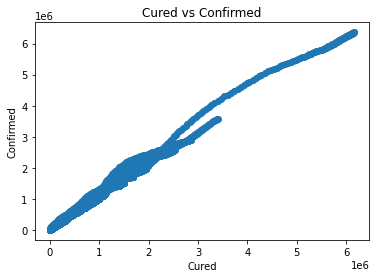

<Figure size 1440x2880 with 0 Axes>

In [48]:
plt.scatter(df.Cured, df.Confirmed)
plt.title('Cured' +' vs Confirmed')
plt.ylabel('Confirmed')
plt.xlabel('Cured')
plt.figure(figsize=(20,40))
plt.show()

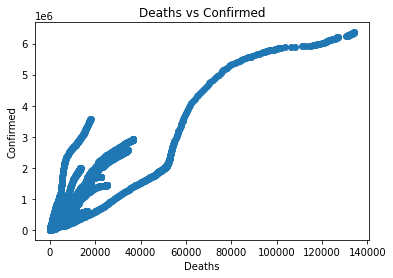

<Figure size 1440x2880 with 0 Axes>

In [49]:
plt.scatter(df.Deaths, df.Confirmed)
plt.title('Deaths' +' vs Confirmed')
plt.ylabel('Confirmed')
plt.xlabel('Deaths')
plt.figure(figsize=(20,40))
plt.show()

<AxesSubplot:title={'center':'Condition Barchart'}, xlabel='Condition', ylabel='count'>

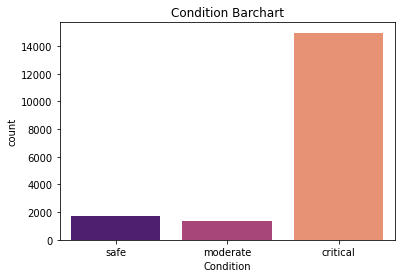

In [50]:
#plt.subplot(4,2,1)
plt.title('Condition Barchart')
sns.countplot(df.Condition,palette=("magma"))

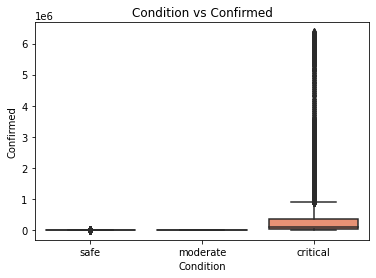

In [51]:
plt.title('Condition vs Confirmed')
sns.boxplot(x=df.Condition, y=df.Confirmed, palette=("magma"))
plt.show()

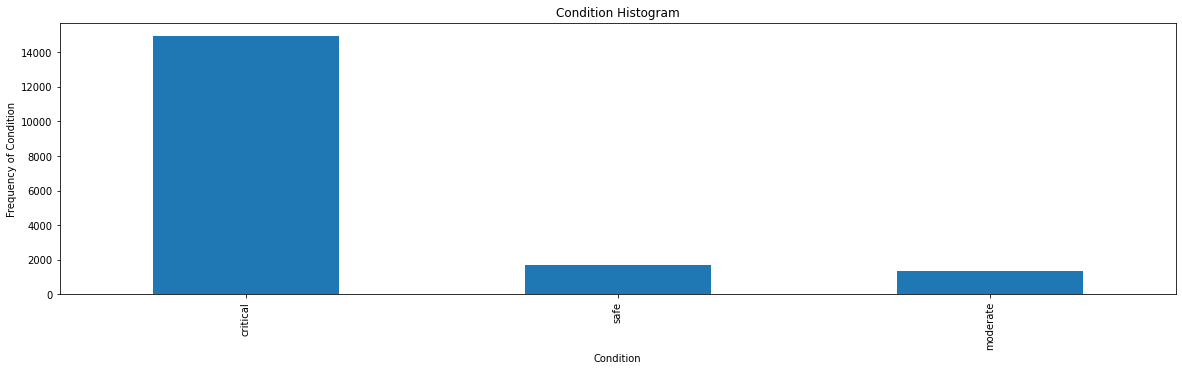

In [52]:
plt.figure(figsize=(20, 5))

plt1 = df.Condition.value_counts().plot(kind='bar')
plt.title('Condition Histogram')
plt1.set(xlabel = 'Condition', ylabel='Frequency of Condition')

plt.show()

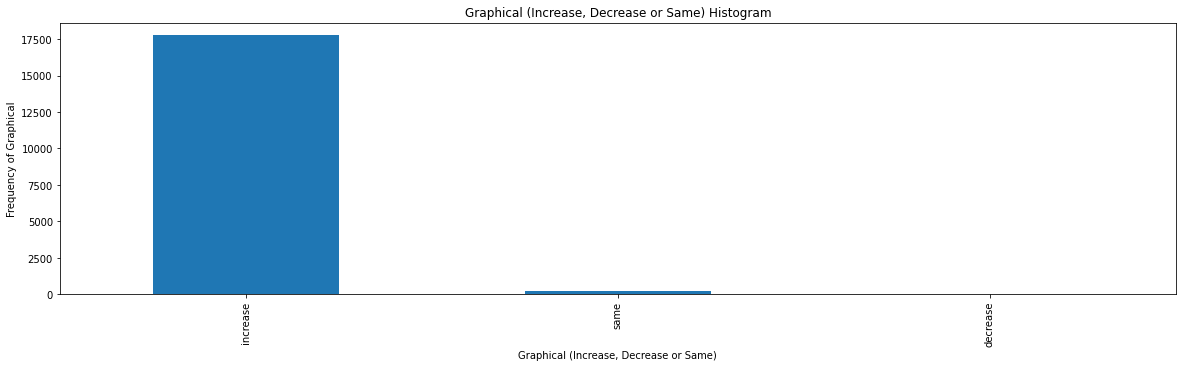

In [53]:
plt.figure(figsize=(20, 5))

plt1 = df.Graph.value_counts().plot(kind='bar')
plt.title('Graphical (Increase, Decrease or Same) Histogram')
plt1.set(xlabel = 'Graphical (Increase, Decrease or Same)', ylabel='Frequency of Graphical')

plt.show()

<Figure size 1800x432 with 0 Axes>

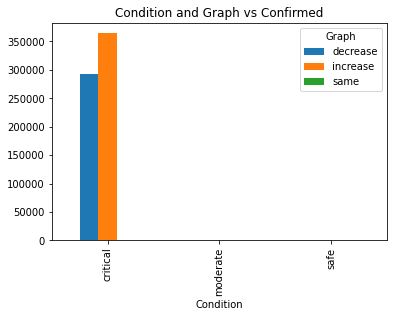

In [54]:
plt.figure(figsize=(25, 6))

d = pd.DataFrame(df.groupby(['Condition','Graph'])['Confirmed'].mean().unstack(fill_value=0))
d.plot.bar()
plt.title('Condition and Graph vs Confirmed')
plt.show()

In [55]:
df.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed,days,months,Condition,Graph
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1,30,1,safe,increase
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1,31,1,safe,increase
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2,1,2,safe,increase
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3,2,2,safe,increase
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3,3,2,safe,increase


In [56]:
continuous_columns = ['Date', 'Time', 'Cured', 'Deaths', 'Confirmed']

corr = df[continuous_columns].corr()
corr.style.background_gradient(cmap='coolwarm')

,Cured,Deaths,Confirmed
Cured,1.000000,0.917492,0.997749
Deaths,0.917492,1.000000,0.918308
Confirmed,0.997749,0.918308,1.000000


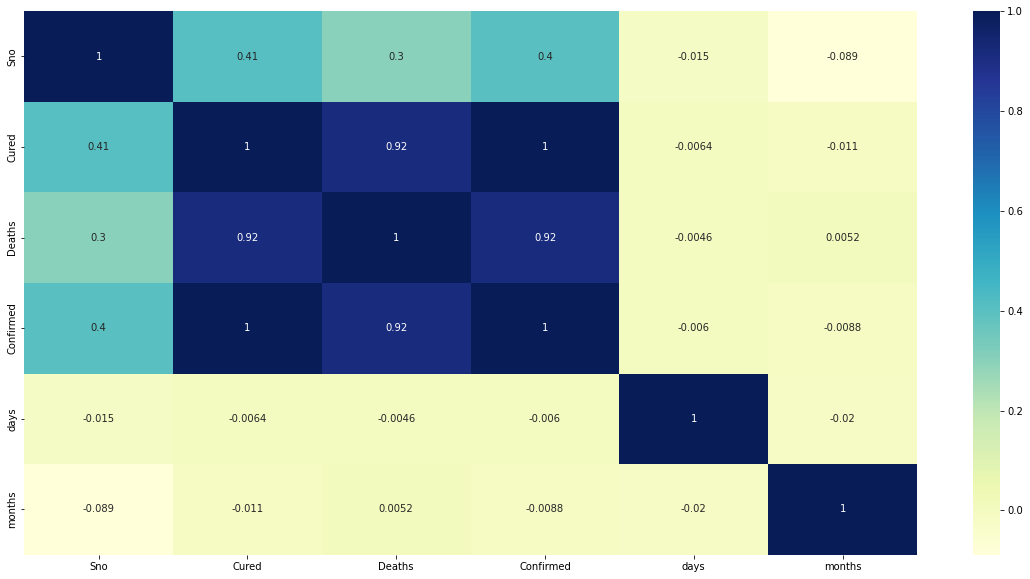

In [57]:
plt.figure(figsize = (20, 10))
sns.heatmap(df.corr(),annot=True,cmap="YlGnBu")
plt.show()

# Splitting and Scaling Data

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [59]:
df.drop('Time', axis = 1, inplace = True)
df.drop('ConfirmedIndianNational', axis = 1, inplace = True)
df.drop('ConfirmedForeignNational', axis = 1, inplace = True)
df.drop('Sno', axis = 1, inplace = True)

In [60]:
df.head()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Condition,Graph
0,2020-01-30,Kerala,0,0,1,safe,increase
1,2020-01-31,Kerala,0,0,1,safe,increase
2,2020-02-01,Kerala,0,0,2,safe,increase
3,2020-02-02,Kerala,0,0,3,safe,increase
4,2020-02-03,Kerala,0,0,3,safe,increase


In [61]:
x = df.iloc[:, :-2].values # Rest of the features
y = df.iloc[:, -2].values # Condition
print(y)

['safe' 'safe' 'safe' ... 'critical' 'critical' 'critical']


In [62]:
# Encoding target variable using Label encoder
le = LabelEncoder()
y = le.fit_transform(y)
y

array([2, 2, 2, ..., 0, 0, 0])

In [63]:
df.drop('Condition', axis = 1, inplace = True)
df.drop('Graph', axis = 1, inplace = True)

In [64]:
df['Condition'] = y

In [65]:
dfNew = pd.get_dummies(df, drop_first=True)
dfNew.head(400)

,Cured,Deaths,Confirmed,Condition,Date_2020-01-31,Date_2020-02-01,Date_2020-02-02,Date_2020-02-03,Date_2020-02-04,Date_2020-02-05,Date_2020-02-06,Date_2020-02-07,Date_2020-02-08,Date_2020-02-09,Date_2020-02-10,Date_2020-02-11,Date_2020-02-12,Date_2020-02-13,Date_2020-02-14,Date_2020-02-15,Date_2020-02-16,Date_2020-02-17,Date_2020-02-18,Date_2020-02-19,Date_2020-02-20,Date_2020-02-21,Date_2020-02-22,Date_2020-02-23,Date_2020-02-24,Date_2020-02-25,Date_2020-02-26,Date_2020-02-27,Date_2020-02-28,Date_2020-02-29,Date_2020-03-01,Date_2020-03-02,Date_2020-03-03,Date_2020-03-04,Date_2020-03-05,Date_2020-03-06,Date_2020-03-07,Date_2020-03-08,Date_2020-03-09,Date_2020-03-10,Date_2020-03-11,Date_2020-03-12,Date_2020-03-13,Date_2020-03-14,Date_2020-03-15,Date_2020-03-16,Date_2020-03-17,Date_2020-03-18,Date_2020-03-19,Date_2020-03-20,Date_2020-03-21,Date_2020-03-22,Date_2020-03-23,Date_2020-03-24,Date_2020-03-25,Date_2020-03-26,Date_2020-03-27,Date_2020-03-28,Date_2020-03-29,Date_2020-03-30,Date_2020-03-31,Date_2020-04-01,Date_2020-04-02,Date_2020-04-03,Date_2020-04-04,Date_2020-04-05,Date_2020-04-06,Date_2020-04-07,Date_2020-04-08,Date_2020-04-09,Date_2020-04-10,Date_2020-04-11,Date_2020-04-12,Date_2020-04-13,Date_2020-04-14,Date_2020-04-15,Date_2020-04-16,Date_2020-04-17,Date_2020-04-18,Date_2020-04-19,Date_2020-04-20,Date_2020-04-21,Date_2020-04-22,Date_2020-04-23,Date_2020-04-24,Date_2020-04-25,Date_2020-04-26,Date_2020-04-27,Date_2020-04-28,Date_2020-04-29,Date_2020-04-30,Date_2020-05-01,Date_2020-05-02,Date_2020-05-03,Date_2020-05-04,Date_2020-05-05,Date_2020-05-06,Date_2020-05-07,Date_2020-05-08,Date_2020-05-09,Date_2020-05-10,Date_2020-05-11,Date_2020-05-12,Date_2020-05-13,Date_2020-05-14,Date_2020-05-15,Date_2020-05-16,Date_2020-05-17,Date_2020-05-18,Date_2020-05-19,Date_2020-05-20,Date_2020-05-21,Date_2020-05-22,Date_2020-05-23,Date_2020-05-24,Date_2020-05-25,Date_2020-05-26,Date_2020-05-27,Date_2020-05-28,Date_2020-05-29,Date_2020-05-30,Date_2020-05-31,Date_2020-06-01,Date_2020-06-02,Date_2020-06-03,Date_2020-06-04,Date_2020-06-05,Date_2020-06-06,Date_2020-06-07,Date_2020-06-08,Date_2020-06-09,Date_2020-06-10,Date_2020-06-11,Date_2020-06-12,Date_2020-06-13,Date_2020-06-14,Date_2020-06-15,Date_2020-06-16,Date_2020-06-17,Date_2020-06-18,Date_2020-06-19,Date_2020-06-20,Date_2020-06-21,Date_2020-06-22,Date_2020-06-23,Date_2020-06-24,Date_2020-06-25,Date_2020-06-26,Date_2020-06-27,Date_2020-06-28,Date_2020-06-29,Date_2020-06-30,Date_2020-07-01,Date_2020-07-02,Date_2020-07-03,Date_2020-07-04,Date_2020-07-05,Date_2020-07-06,Date_2020-07-07,Date_2020-07-08,Date_2020-07-09,Date_2020-07-10,Date_2020-07-11,Date_2020-07-12,Date_2020-07-13,Date_2020-07-14,Date_2020-07-15,Date_2020-07-16,Date_2020-07-17,Date_2020-07-18,Date_2020-07-19,Date_2020-07-20,Date_2020-07-21,Date_2020-07-22,Date_2020-07-23,Date_2020-07-24,Date_2020-07-25,Date_2020-07-26,Date_2020-07-27,Date_2020-07-28,Date_2020-07-29,Date_2020-07-30,Date_2020-07-31,Date_2020-08-01,Date_2020-08-02,Date_2020-08-03,Date_2020-08-04,Date_2020-08-05,Date_2020-08-06,Date_2020-08-07,Date_2020-08-08,Date_2020-08-09,Date_2020-08-10,Date_2020-08-11,Date_2020-08-12,Date_2020-08-13,Date_2020-08-14,Date_2020-08-15,Date_2020-08-16,Date_2020-08-17,Date_2020-08-18,Date_2020-08-19,Date_2020-08-20,Date_2020-08-21,Date_2020-08-22,Date_2020-08-23,Date_2020-08-24,Date_2020-08-25,Date_2020-08-26,Date_2020-08-27,Date_2020-08-28,Date_2020-08-29,Date_2020-08-30,Date_2020-08-31,Date_2020-09-01,Date_2020-09-02,Date_2020-09-03,Date_2020-09-04,Date_2020-09-05,Date_2020-09-06,Date_2020-09-07,Date_2020-09-08,Date_2020-09-09,Date_2020-09-10,Date_2020-09-11,Date_2020-09-12,Date_2020-09-13,Date_2020-09-14,Date_2020-09-15,Date_2020-09-16,Date_2020-09-17,Date_2020-09-18,Date_2020-09-19,Date_2020-09-20,Date_2020-09-21,Date_2020-09-22,Date_2020-09-23,Date_2020-09-24,Date_2020-09-25,Date_2020-09-26,Date_2020-09-27,Date_2020-09-28,Date_2020-09-29,Date_2020-09-30,Date_2020-10-01,Date_2020-10-02,Date_2020-10-03,Date_2020-10-0

In [67]:
# x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 1, test_size = 0.25)
# y_train
df_train, df_test = train_test_split(dfNew, train_size= 0.7, test_size= 0.3, random_state=1)
df_train

,Cured,Deaths,Confirmed,Condition,Date_2020-01-31,Date_2020-02-01,Date_2020-02-02,Date_2020-02-03,Date_2020-02-04,Date_2020-02-05,Date_2020-02-06,Date_2020-02-07,Date_2020-02-08,Date_2020-02-09,Date_2020-02-10,Date_2020-02-11,Date_2020-02-12,Date_2020-02-13,Date_2020-02-14,Date_2020-02-15,Date_2020-02-16,Date_2020-02-17,Date_2020-02-18,Date_2020-02-19,Date_2020-02-20,Date_2020-02-21,Date_2020-02-22,Date_2020-02-23,Date_2020-02-24,Date_2020-02-25,Date_2020-02-26,Date_2020-02-27,Date_2020-02-28,Date_2020-02-29,Date_2020-03-01,Date_2020-03-02,Date_2020-03-03,Date_2020-03-04,Date_2020-03-05,Date_2020-03-06,Date_2020-03-07,Date_2020-03-08,Date_2020-03-09,Date_2020-03-10,Date_2020-03-11,Date_2020-03-12,Date_2020-03-13,Date_2020-03-14,Date_2020-03-15,Date_2020-03-16,Date_2020-03-17,Date_2020-03-18,Date_2020-03-19,Date_2020-03-20,Date_2020-03-21,Date_2020-03-22,Date_2020-03-23,Date_2020-03-24,Date_2020-03-25,Date_2020-03-26,Date_2020-03-27,Date_2020-03-28,Date_2020-03-29,Date_2020-03-30,Date_2020-03-31,Date_2020-04-01,Date_2020-04-02,Date_2020-04-03,Date_2020-04-04,Date_2020-04-05,Date_2020-04-06,Date_2020-04-07,Date_2020-04-08,Date_2020-04-09,Date_2020-04-10,Date_2020-04-11,Date_2020-04-12,Date_2020-04-13,Date_2020-04-14,Date_2020-04-15,Date_2020-04-16,Date_2020-04-17,Date_2020-04-18,Date_2020-04-19,Date_2020-04-20,Date_2020-04-21,Date_2020-04-22,Date_2020-04-23,Date_2020-04-24,Date_2020-04-25,Date_2020-04-26,Date_2020-04-27,Date_2020-04-28,Date_2020-04-29,Date_2020-04-30,Date_2020-05-01,Date_2020-05-02,Date_2020-05-03,Date_2020-05-04,Date_2020-05-05,Date_2020-05-06,Date_2020-05-07,Date_2020-05-08,Date_2020-05-09,Date_2020-05-10,Date_2020-05-11,Date_2020-05-12,Date_2020-05-13,Date_2020-05-14,Date_2020-05-15,Date_2020-05-16,Date_2020-05-17,Date_2020-05-18,Date_2020-05-19,Date_2020-05-20,Date_2020-05-21,Date_2020-05-22,Date_2020-05-23,Date_2020-05-24,Date_2020-05-25,Date_2020-05-26,Date_2020-05-27,Date_2020-05-28,Date_2020-05-29,Date_2020-05-30,Date_2020-05-31,Date_2020-06-01,Date_2020-06-02,Date_2020-06-03,Date_2020-06-04,Date_2020-06-05,Date_2020-06-06,Date_2020-06-07,Date_2020-06-08,Date_2020-06-09,Date_2020-06-10,Date_2020-06-11,Date_2020-06-12,Date_2020-06-13,Date_2020-06-14,Date_2020-06-15,Date_2020-06-16,Date_2020-06-17,Date_2020-06-18,Date_2020-06-19,Date_2020-06-20,Date_2020-06-21,Date_2020-06-22,Date_2020-06-23,Date_2020-06-24,Date_2020-06-25,Date_2020-06-26,Date_2020-06-27,Date_2020-06-28,Date_2020-06-29,Date_2020-06-30,Date_2020-07-01,Date_2020-07-02,Date_2020-07-03,Date_2020-07-04,Date_2020-07-05,Date_2020-07-06,Date_2020-07-07,Date_2020-07-08,Date_2020-07-09,Date_2020-07-10,Date_2020-07-11,Date_2020-07-12,Date_2020-07-13,Date_2020-07-14,Date_2020-07-15,Date_2020-07-16,Date_2020-07-17,Date_2020-07-18,Date_2020-07-19,Date_2020-07-20,Date_2020-07-21,Date_2020-07-22,Date_2020-07-23,Date_2020-07-24,Date_2020-07-25,Date_2020-07-26,Date_2020-07-27,Date_2020-07-28,Date_2020-07-29,Date_2020-07-30,Date_2020-07-31,Date_2020-08-01,Date_2020-08-02,Date_2020-08-03,Date_2020-08-04,Date_2020-08-05,Date_2020-08-06,Date_2020-08-07,Date_2020-08-08,Date_2020-08-09,Date_2020-08-10,Date_2020-08-11,Date_2020-08-12,Date_2020-08-13,Date_2020-08-14,Date_2020-08-15,Date_2020-08-16,Date_2020-08-17,Date_2020-08-18,Date_2020-08-19,Date_2020-08-20,Date_2020-08-21,Date_2020-08-22,Date_2020-08-23,Date_2020-08-24,Date_2020-08-25,Date_2020-08-26,Date_2020-08-27,Date_2020-08-28,Date_2020-08-29,Date_2020-08-30,Date_2020-08-31,Date_2020-09-01,Date_2020-09-02,Date_2020-09-03,Date_2020-09-04,Date_2020-09-05,Date_2020-09-06,Date_2020-09-07,Date_2020-09-08,Date_2020-09-09,Date_2020-09-10,Date_2020-09-11,Date_2020-09-12,Date_2020-09-13,Date_2020-09-14,Date_2020-09-15,Date_2020-09-16,Date_2020-09-17,Date_2020-09-18,Date_2020-09-19,Date_2020-09-20,Date_2020-09-21,Date_2020-09-22,Date_2020-09-23,Date_2020-09-24,Date_2020-09-25,Date_2020-09-26,Date_2020-09-27,Date_2020-09-28,Date_2020-09-29,Date_2020-09-30,Date_2020-10-01,Date_2020-10-02,Date_2020-10-03,Date_2020-10-0

In [68]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars = ['Cured', 'Deaths', 'Confirmed']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars].copy())

In [69]:
df_train.head()

,Cured,Deaths,Confirmed,Condition,Date_2020-01-31,Date_2020-02-01,Date_2020-02-02,Date_2020-02-03,Date_2020-02-04,Date_2020-02-05,Date_2020-02-06,Date_2020-02-07,Date_2020-02-08,Date_2020-02-09,Date_2020-02-10,Date_2020-02-11,Date_2020-02-12,Date_2020-02-13,Date_2020-02-14,Date_2020-02-15,Date_2020-02-16,Date_2020-02-17,Date_2020-02-18,Date_2020-02-19,Date_2020-02-20,Date_2020-02-21,Date_2020-02-22,Date_2020-02-23,Date_2020-02-24,Date_2020-02-25,Date_2020-02-26,Date_2020-02-27,Date_2020-02-28,Date_2020-02-29,Date_2020-03-01,Date_2020-03-02,Date_2020-03-03,Date_2020-03-04,Date_2020-03-05,Date_2020-03-06,Date_2020-03-07,Date_2020-03-08,Date_2020-03-09,Date_2020-03-10,Date_2020-03-11,Date_2020-03-12,Date_2020-03-13,Date_2020-03-14,Date_2020-03-15,Date_2020-03-16,Date_2020-03-17,Date_2020-03-18,Date_2020-03-19,Date_2020-03-20,Date_2020-03-21,Date_2020-03-22,Date_2020-03-23,Date_2020-03-24,Date_2020-03-25,Date_2020-03-26,Date_2020-03-27,Date_2020-03-28,Date_2020-03-29,Date_2020-03-30,Date_2020-03-31,Date_2020-04-01,Date_2020-04-02,Date_2020-04-03,Date_2020-04-04,Date_2020-04-05,Date_2020-04-06,Date_2020-04-07,Date_2020-04-08,Date_2020-04-09,Date_2020-04-10,Date_2020-04-11,Date_2020-04-12,Date_2020-04-13,Date_2020-04-14,Date_2020-04-15,Date_2020-04-16,Date_2020-04-17,Date_2020-04-18,Date_2020-04-19,Date_2020-04-20,Date_2020-04-21,Date_2020-04-22,Date_2020-04-23,Date_2020-04-24,Date_2020-04-25,Date_2020-04-26,Date_2020-04-27,Date_2020-04-28,Date_2020-04-29,Date_2020-04-30,Date_2020-05-01,Date_2020-05-02,Date_2020-05-03,Date_2020-05-04,Date_2020-05-05,Date_2020-05-06,Date_2020-05-07,Date_2020-05-08,Date_2020-05-09,Date_2020-05-10,Date_2020-05-11,Date_2020-05-12,Date_2020-05-13,Date_2020-05-14,Date_2020-05-15,Date_2020-05-16,Date_2020-05-17,Date_2020-05-18,Date_2020-05-19,Date_2020-05-20,Date_2020-05-21,Date_2020-05-22,Date_2020-05-23,Date_2020-05-24,Date_2020-05-25,Date_2020-05-26,Date_2020-05-27,Date_2020-05-28,Date_2020-05-29,Date_2020-05-30,Date_2020-05-31,Date_2020-06-01,Date_2020-06-02,Date_2020-06-03,Date_2020-06-04,Date_2020-06-05,Date_2020-06-06,Date_2020-06-07,Date_2020-06-08,Date_2020-06-09,Date_2020-06-10,Date_2020-06-11,Date_2020-06-12,Date_2020-06-13,Date_2020-06-14,Date_2020-06-15,Date_2020-06-16,Date_2020-06-17,Date_2020-06-18,Date_2020-06-19,Date_2020-06-20,Date_2020-06-21,Date_2020-06-22,Date_2020-06-23,Date_2020-06-24,Date_2020-06-25,Date_2020-06-26,Date_2020-06-27,Date_2020-06-28,Date_2020-06-29,Date_2020-06-30,Date_2020-07-01,Date_2020-07-02,Date_2020-07-03,Date_2020-07-04,Date_2020-07-05,Date_2020-07-06,Date_2020-07-07,Date_2020-07-08,Date_2020-07-09,Date_2020-07-10,Date_2020-07-11,Date_2020-07-12,Date_2020-07-13,Date_2020-07-14,Date_2020-07-15,Date_2020-07-16,Date_2020-07-17,Date_2020-07-18,Date_2020-07-19,Date_2020-07-20,Date_2020-07-21,Date_2020-07-22,Date_2020-07-23,Date_2020-07-24,Date_2020-07-25,Date_2020-07-26,Date_2020-07-27,Date_2020-07-28,Date_2020-07-29,Date_2020-07-30,Date_2020-07-31,Date_2020-08-01,Date_2020-08-02,Date_2020-08-03,Date_2020-08-04,Date_2020-08-05,Date_2020-08-06,Date_2020-08-07,Date_2020-08-08,Date_2020-08-09,Date_2020-08-10,Date_2020-08-11,Date_2020-08-12,Date_2020-08-13,Date_2020-08-14,Date_2020-08-15,Date_2020-08-16,Date_2020-08-17,Date_2020-08-18,Date_2020-08-19,Date_2020-08-20,Date_2020-08-21,Date_2020-08-22,Date_2020-08-23,Date_2020-08-24,Date_2020-08-25,Date_2020-08-26,Date_2020-08-27,Date_2020-08-28,Date_2020-08-29,Date_2020-08-30,Date_2020-08-31,Date_2020-09-01,Date_2020-09-02,Date_2020-09-03,Date_2020-09-04,Date_2020-09-05,Date_2020-09-06,Date_2020-09-07,Date_2020-09-08,Date_2020-09-09,Date_2020-09-10,Date_2020-09-11,Date_2020-09-12,Date_2020-09-13,Date_2020-09-14,Date_2020-09-15,Date_2020-09-16,Date_2020-09-17,Date_2020-09-18,Date_2020-09-19,Date_2020-09-20,Date_2020-09-21,Date_2020-09-22,Date_2020-09-23,Date_2020-09-24,Date_2020-09-25,Date_2020-09-26,Date_2020-09-27,Date_2020-09-28,Date_2020-09-29,Date_2020-09-30,Date_2020-10-01,Date_2020-10-02,Date_2020-10-03,Date_2020-10-0

In [70]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
Cured,12632.0,3.262467e-17,1.000040,-0.455647,-0.450114,-0.399855,-0.003054,9.580193
Deaths,12632.0,1.012490e-17,1.000040,-0.372908,-0.369889,-0.317525,-0.039697,11.901914
Confirmed,12632.0,-3.374965e-17,1.000040,-0.460902,-0.454251,-0.399317,-0.003389,9.243034
Condition,12632.0,2.693952e-01,0.625523,0.000000,0.000000,0.000000,0.000000,2.000000
Date_2020-01-31,12632.0,7.916403e-05,0.008897,0.000000,0.000000,0.000000,0.000000,1.000000
...,...,...,...,...,...,...,...,...
State/UnionTerritory_Telangana,12632.0,3.039899e-02,0.171689,0.000000,0.000000,0.000000,0.000000,1.000000
State/UnionTerritory_Tripura,12632.0,2.493667e-02,0.155938,0.000000,0.000000,0.000000,0.000000,1.000000
State/UnionTerritory_Uttar Pradesh,12632.0,2.762825e-02,0.163912,0.000000,0.000000,0.000000,0.000000,1.000000
State/UnionTerritory_Uttarakhand,12632.0,2.754908e-02,0.163683,0.000000,0.000000,0.000000,0.000000,1.000000


In [71]:
#Dividing data into X and y variables
y_train = df_train.pop('Condition')
X_train = df_train

In [72]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_vars = ['Cured', 'Deaths', 'Confirmed']
df_test[num_vars] = scaler.fit_transform(df_test[num_vars].copy())

In [73]:
#Dividing data into X and y variables
y_test = df_test.pop('Condition')
X_test = df_test

In [74]:
X_train.shape

(12632, 597)

# Model Building

# Using KNN Classifier

In [75]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,plot_confusion_matrix, plot_roc_curve

In [76]:
# Creating KNN Model.
# n_neighbour = square_root(total number of instances in data) = k 
# k should be odd
knn_clf = KNeighborsClassifier(n_neighbors = 111, p = 2, metric = 'euclidean')
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=111)

In [77]:
y_pred = knn_clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[4450   35   24]
 [ 284   91   36]
 [ 283   71  141]]


In [79]:
print(accuracy_score(y_test, y_pred))

0.8646352723915051


In [80]:
# Define function to perform model result analysis
def getModelPerf(X_train, y_train, X_test, y_test, clf,):
    class_label = ['Safe', 'Moderate', 'Critical']
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    # Performance Metrics
    accuracy  = round(100 * accuracy_score(y_test, y_pred), 2)
    precision = round(100 * precision_score(y_test, y_pred, average='micro'), 2)
    recall    = round(100 * recall_score(y_test, y_pred, average='micro'), 2) 
    f1        = round(f1_score(y_test, y_pred, average='micro'), 2)
    
    cm = confusion_matrix(y_test, y_pred)
    print(" Confusion Matrix: ")
    print("----------------------")
    plot_confusion_matrix(clf, X_test, y_test, display_labels=class_label, cmap='viridis')
    plt.show()
    print("\n Accuracy metrics: ")
    print("----------------------")
    print("Accuracy:  {0}".format(accuracy))
    print("Precision: {0}".format(precision))
    print("Recall:    {0}".format(recall))
    print("F1:        {0}".format(f1))
    # print("\n ROC Curve: ")
    # print("----------------------")
    #plot_roc_curve(clf, X_test, y_test)
    plt.show()
#     return accuracy, precision, recall, f1,clf

 Confusion Matrix: 
----------------------


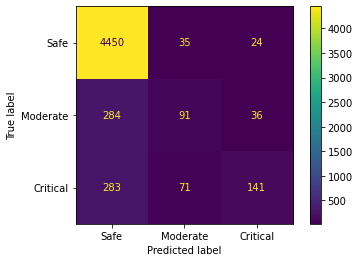


 Accuracy metrics: 
----------------------
Accuracy:  86.46
Precision: 86.46
Recall:    86.46
F1:        0.86


In [81]:
getModelPerf(X_train, y_train, X_test, y_test, knn_clf)

# Using Naive Bayes Classifier

In [82]:
from sklearn.naive_bayes import GaussianNB

In [83]:
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [84]:
y_pred_NB = classifier.predict(X_test)
y_pred_NB

array([0, 0, 0, ..., 0, 0, 0])

In [85]:
cm_nb = confusion_matrix(y_test, y_pred_NB)
print(cm_nb)

[[3969  540    0]
 [  31  380    0]
 [  17  372  106]]


In [86]:
print(accuracy_score(y_test, y_pred_NB))

0.8227146814404432


In [87]:
# Define function to perform model result analysis
def getModelPerf(X_train, y_train, X_test, y_test, clf,):
    class_label = ['Safe', 'Moderate', 'Critical']
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    # Performance Metrics
    accuracy  = round(100 * accuracy_score(y_test, y_pred_NB), 2)
    precision = round(100 * precision_score(y_test, y_pred_NB, average='micro'), 2)
    recall    = round(100 * recall_score(y_test, y_pred_NB, average='micro'), 2) 
    f1        = round(f1_score(y_test, y_pred_NB, average='micro'), 2)
    
    cm = confusion_matrix(y_test, y_pred_NB)
    print(" Confusion Matrix: ")
    print("----------------------")
    plot_confusion_matrix(clf, X_test, y_test, display_labels=class_label, cmap='viridis')
    plt.show()
    print("\n Accuracy metrics: ")
    print("----------------------")
    print("Accuracy:  {0}".format(accuracy))
    print("Precision: {0}".format(precision))
    print("Recall:    {0}".format(recall))
    print("F1:        {0}".format(f1))
    # print("\n ROC Curve: ")
    # print("----------------------")
    #plot_roc_curve(clf, X_test, y_test)
    plt.show()
#     return accuracy, precision, recall, f1,clf

 Confusion Matrix: 
----------------------


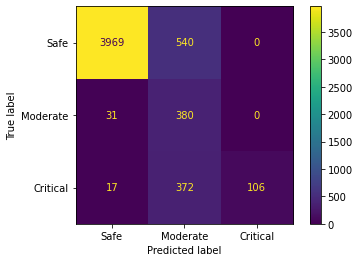


 Accuracy metrics: 
----------------------
Accuracy:  82.27
Precision: 82.27
Recall:    82.27
F1:        0.82


In [88]:
getModelPerf(X_train, y_train, X_test, y_test, classifier)

# Using Decision Tree

In [89]:
from sklearn.tree import DecisionTreeClassifier

In [90]:
decisionTree = DecisionTreeClassifier()
decisionTree.fit(X_train, y_train)

DecisionTreeClassifier()

In [91]:
y_pred_DT = decisionTree.predict(X_test)
y_pred_DT

array([0, 0, 0, ..., 0, 0, 0])

In [92]:
cm_dt = confusion_matrix(y_test, y_pred_DT)
print(cm_dt)

[[4509    0    0]
 [ 411    0    0]
 [ 495    0    0]]


In [93]:
print(accuracy_score(y_test, y_pred_DT))

0.8326869806094183


In [94]:
# Define function to perform model result analysis
def getModelPerf(X_train, y_train, X_test, y_test, clf,):
    class_label = ['Safe', 'Moderate', 'Critical']
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    # Performance Metrics
    accuracy  = round(100 * accuracy_score(y_test, y_pred_DT), 2)
    precision = round(100 * precision_score(y_test, y_pred_DT, average='micro'), 2)
    recall    = round(100 * recall_score(y_test, y_pred_DT, average='micro'), 2) 
    f1        = round(f1_score(y_test, y_pred_DT, average='micro'), 2)
    
    cm = confusion_matrix(y_test, y_pred_DT)
    print(" Confusion Matrix: ")
    print("----------------------")
    plot_confusion_matrix(clf, X_test, y_test, display_labels=class_label, cmap='viridis')
    plt.show()
    print("\n Accuracy metrics: ")
    print("----------------------")
    print("Accuracy:  {0}".format(accuracy))
    print("Precision: {0}".format(precision))
    print("Recall:    {0}".format(recall))
    print("F1:        {0}".format(f1))
    # print("\n ROC Curve: ")
    # print("----------------------")
    #plot_roc_curve(clf, X_test, y_test)
    plt.show()
#     return accuracy, precision, recall, f1,clf

 Confusion Matrix: 
----------------------


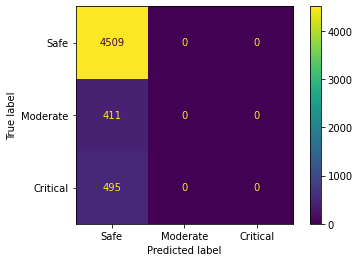


 Accuracy metrics: 
----------------------
Accuracy:  83.27
Precision: 83.27
Recall:    83.27
F1:        0.83


In [95]:
getModelPerf(X_train, y_train, X_test, y_test, decisionTree)

# Based on the above used classifiers -> KNN, Naive Bayes and Decision Tree, KNN gives best accuracy in prediction followed by Decision Tree and then Naive Bayes.